# Preparación y Limpieza de Datos

**Cargar BD 'spotify-2023.csv'**

---
Obtener datos de la base 'spotify-2023.csv' directo de kaggle

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import sklearn.cluster as skcluster
from scipy.stats import f_oneway
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import MinMaxScaler

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/top-spotify-songs-2023")

print("Path to dataset files:", path)


df = pd.read_csv("/kaggle/input/top-spotify-songs-2023/spotify-2023.csv", encoding="latin1")

df.head()


Using Colab cache for faster access to the 'top-spotify-songs-2023' dataset.
Path to dataset files: /kaggle/input/top-spotify-songs-2023


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Conjunto de Datos: Canciones Más Escuchadas en Spotify 2023
Este conjunto de datos contiene una lista completa de las canciones más famosas de 2023 hasta agosto de 2023, según la lista de Spotify. El conjunto de datos contiene información básica sobre cada canción, como el nombre de la pista, el nombre del artista o artistas y la fecha de lanzamiento. Además, el conjunto de datos también contiene varias de las características de audio de cada pista. Finalmente, el conjunto de datos también contiene otras estadísticas, como el número de listas de reproducción en las que se incluye una canción y la presencia de una canción en las listas de la plataforma en Apple Music, Deezer, Shazam y Spotify.


1. track_name: Nombre de la canción.
2. artist(s)_name: Nombre del artista(s) de la canción.
3. artist_count: Número de artistas que contribuyen a la canción.
4. released_year: Año en que se lanzó la canción.
5. released_month: Mes en que se lanzó la canción.
6. released_day: Día del mes en que se lanzó la canción.
7. in_spotify_playlists: El número de listas de reproducción de Spotify en las que se incluye la canción.
8. in_spotify_charts: Presencia y ranking de la canción en las listas de Spotify.
9. streams: Número total de reproducciones en Spotify.
10. in_apple_playlists: El número de listas de reproducción de Apple Music en las que se incluye la canción.
11. in_apple_charts: Presencia y ranking de la canción en las listas de Apple Music.
12. in_deezer_playlists: El número de listas de reproducción de Deezer en las que se incluye la canción.
13. in_deezer_charts: Presencia y ranking de la canción en las listas de Deezer.
14. in_shazam_charts: Presencia y ranking de la canción en las listas de Shazam.
15. bpm: Los beats por minuto (pulsos por minuto) de la canción; una medida del tempo de la canción.
16. key: La tonalidad de la canción.
17. mode: Modo de la canción (mayor o menor).
18. danceability_%: Porcentaje que indica qué tan adecuada es la canción para bailar.
19. valence_%: Positividad del contenido musical de la canción.
20. energy_%: Nivel de energía percibido de la canción.
21. acousticness_%: Nivel de confianza de que la canción es acústica.
22. instrumentalness_%: Probabilidad de que la canción no contenga contenido vocal (los "Ooh"s y "aah"s se tratan como no vocales en este contexto).
23. liveness_%: Probabilidad de que la canción haya sido interpretada en vivo.
24. speechiness_%: Presencia de palabras habladas en una pista (67% y más son probablemente pistas de palabras puramente habladas, 33%-66% son pistas que contienen tanto música como palabras habladas, por debajo del 33% son muy probablemente música y otras pistas sin palabras habladas).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Limpieza de nombres de artistas y de cancion


In [ ]:
import pandas as pd
import string

def normalize_string(text):
    if not isinstance(text, str):
        return text

    # Diccionario para la normalización de letras Latinas y 'ñ' a 'n'
    norm_vocal = {
        'a':'a', 'á':'a', 'ä':'a', 'à':'a', 'A':'a', 'Á':'a', 'Ä':'a', 'À':'a',
        'e':'e', 'é':'e', 'ë':'e', 'è':'e', 'E':'e', 'É':'e', 'Ë':'e', 'È':'e',
        'i':'i', 'í':'i', 'ï':'i', 'ì':'i', 'I':'i', 'Í':'i', 'Ï':'i', 'Ì':'i',
        'o':'o', 'ó':'o', 'ö':'o', 'ò':'o', 'O':'o', 'Ó':'o', 'Ö':'o', 'Ò':'o',
        'u':'u', 'ú':'u', 'ü':'u', 'ù':'u', 'U':'u', 'Ú':'u', 'Ü':'u', 'Ù':'u',
        'ñ':'n', 'Ñ':'n', # Agregado ñ -> n
        'ç':'c', 'Ç':'c', # Agregado ç -> c (carácter común en alfabetos latinos)
    }

    # 1. Normalizar caracteres según el diccionario
    normalized_text = ""
    for char in text:
        # Usa el valor mapeado si existe, sino usa el carácter original
        normalized_text += norm_vocal.get(char, char)

    # 2. Convertir a minúsculas
    normalized_text = normalized_text.lower()

    # 3. Eliminar puntuación (excepto comas)
    # Se crea una cadena de caracteres de puntuación, excluyendo la coma (',')
    punctuation_to_remove = string.punctuation.replace(',', '')
    # Se crea una tabla de traducción para eliminar estos caracteres
    translator = str.maketrans('', '', punctuation_to_remove)
    normalized_text = normalized_text.translate(translator)

    # 4. Estandarizar espacios: reduce múltiples espacios a uno y elimina los de los extremos
    normalized_text = ' '.join(normalized_text.split()).strip()

    return normalized_text

# Cargar el dataset y aplicar la función (ejecutado en el entorno)
df['normalized_artist_name'] = df['artist(s)_name'].apply(normalize_string)
df['normalized_track_name'] = df['track_name'].apply(normalize_string)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,normalized_artist_name,normalized_track_name
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,"latto, jung kook",seven feat latto explicit ver
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,myke towers,lala
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,olivia rodrigo,vampire
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,taylor swift,cruel summer
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,bad bunny,where she goes


In [ ]:
# Obtengamos todos los artistas de artist(s) name
norm_artists_list = []
for artist in df['normalized_artist_name'].unique():
    #Imprime cada artista de lac cancion (separado por coma)
    artists = artist.split(',')
    for artist in artists:
        norm_artists_list.append(artist.strip())
norm_artists_list = list(set(norm_artists_list))
print(len(norm_artists_list),norm_artists_list)


699 ['', 'nayeon', 'standly', 'gurinder gill', 'sampha', 'myke towers', 'lasso', 'ludwig goransson', 'grayson vill', 'harry styles', 'dj escobar', 'mc menor hr', 'aap rocky', 'manuel turizo', 'cartel de santa', 'bomba esti¿½i¿½reo', 'madonna', 'eric church', 'rosa linn', 'agroplay', 'young thug', 'burna boy', 'dj yo', '4town from disney and pixari¿½i¿½i¿½s turning red', 'la adictiva', 'agust d', 'anderson paak', 'danny ocean', 'bei¿½i', 'yuridia', 'chris rea', 'fmk', 'roisee', 'blanco', 'grupo frontera', 'mc pedrinho', 'ha sung woon', 'jay rock', 'tii¿½i¿½sto', 'kendrick lamar', 'thxsomch', 'maldy', 'kenia os', 'eladio carrion', 'mi¿½i¿½ne', 'surf curse', 'mabel matiz', 'musical youth', 'xami¿½i¿½', 'paloma faith', 'yung gravy', 'ariana grande', 'miguel', 'jax jones', 'juseph', 'bebe rexha', 'ella henderson', 'amitabh bhattacharya', 'steve lacy', 'joji', 'mc vitin da igrejinha', 'calvin harris', 'shilpa rao', 'suga', 'nirvana', 'the anxiety', 'saiko', 'jimin', 'lil cake', 'aerosmith', 

In [ ]:
# Definir y aplicar el filtro de caracteres especiales ---
import re
# Definición del patrón: busca cualquier carácter que NO sea una palabra (\w, incluye letras y números),
# NO sea un espacio (\s) y NO sea una coma (,)
# Esto coincide con cualquier carácter especial o de puntuación.
special_char_pattern = re.compile(r'[^\w\s,]+')

artists_with_special_chars = []
for artist in norm_artists_list:
    # Usamos re.search para verificar si el patrón de caracter especial está presente
    if special_char_pattern.search(artist):
        artists_with_special_chars.append(artist)

# Imprimimos
print("--- Artistas con Caracteres Especiales en su Nombre Original ---")
print(f"Total de artistas encontrados: {len(artists_with_special_chars)}")
print("\nLista de artistas:")
for artist in artists_with_special_chars:
    print(f"- {artist}")

--- Artistas con Caracteres Especiales en su Nombre Original ---
Total de artistas encontrados: 31

Lista de artistas:
- bomba esti¿½i¿½reo
- 4town from disney and pixari¿½i¿½i¿½s turning red
- bei¿½i
- tii¿½i¿½sto
- mi¿½i¿½ne
- xami¿½i¿½
- lui¿½i¿½sa sonza
- lenny tavi¿½i¿½rez
- zi¿½i¿½ neto crist
- zi¿½i¿½ fe
- jasiel nui¿½i¿½ez
- eden mui¿½i
- beyonci¿
- matui¿
- cruz cafuni¿½i¿½
- josi¿½i¿½ felic
- doi¿½i¿½u
- mari¿½i¿½lia mendo
- rosali¿½
- the mari¿½i
- bi¿½i¿½jo
- mari¿½i¿½lia mendoni¿½i¿½a
- schi¿½i¿½rze
- ri¿½i¿½ma
- dj lk da esci¿½i¿½cia
- ri¿½i
- michael bubli¿
- tii¿½i¿
- bi¿½
- matui¿½i¿½
- elley duhi¿


Ya que son solo 31 artistas, decidimos que eliminaremos las canciones que contengan estos artistas

In [ ]:
import pandas as pd
import numpy as np

artistas_a_eliminar = artists_with_special_chars
print(f"Número de artistas problemáticos: {len(artistas_a_eliminar)}")

# Función para verificar si un artista está presente ---
def contiene_artista(cadena_artistas, lista_artistas_prohibidos):
    """
    Verifica si alguna de las subcadenas (artistas) en cadena_artistas (separados por coma)
    está contenida en la lista de artistas prohibidos.

    Args:
        cadena_artistas (str): La cadena de la columna 'normalized_artist_name' (ej. 'artista1, artista2')
        lista_artistas_prohibidos (list): La lista de artistas a eliminar.

    Returns:
        bool: True si la canción contiene un artista prohibido, False en caso contrario.
    """
    if not isinstance(cadena_artistas, str):
        # Maneja posibles NaN u otros valores no string
        return False


    # Comprueba si algún artista de la canción está en la lista de prohibidos
    for artista in cadena_artistas.split(','):
        if artista in lista_artistas_prohibidos:
            return True

    return False

df_limpio = df.copy()
for fila in df_limpio.index:
    if contiene_artista(df_limpio.loc[fila, 'normalized_artist_name'], artistas_a_eliminar):
        df_limpio.drop(fila, inplace=True)

print(f"Filas originales: {len(df)}")
print(f"Filas después de la limpieza: {len(df_limpio)}")
print(f"Filas eliminadas: {len(df) - len(df_limpio)}")

Número de artistas problemáticos: 31
Filas originales: 953
Filas después de la limpieza: 919
Filas eliminadas: 34


Ya que solo se eliminaron 34 filas, mantenemos los cambios

In [ ]:
df = df_limpio.copy()

**Canciones con track_name con caracteres especiales**

De igual forma identificamos las canciones cuyo track_name contiene caracteres especiales

In [ ]:
# Definir y aplicar el filtro de caracteres especiales
import re
# Definición del patrón: busca cualquier carácter que NO sea una palabra (\w, incluye letras y números),
# NO sea un espacio (\s)
# Esto coincide con cualquier carácter especial o de puntuación.
special_char_pattern = re.compile(r'[^\w\s,]+')

# Lo aplicamos en los nombres de canciones normalizados
songs_with_special_chars = []
for song in df['normalized_track_name']:
    # Usamos re.search para verificar si el patrón de caracter especial está presente
    if special_char_pattern.search(song):
        songs_with_special_chars.append(song)

# Imprimir Resultados
print("--- Canciones con Caracteres Especiales en su Nombre Original ---")
print(f"Total de canciones encontrados: {len(songs_with_special_chars)}")
print("\nLista de artistas:")
for song in songs_with_special_chars:
    print(f"- {song}")

--- Canciones con Caracteres Especiales en su Nombre Original ---
Total de canciones encontrados: 60

Lista de artistas:
- i can see you taylori¿½i¿½i¿½s version from the
- fri¿½i¿½gil feat grupo front
- ti¿½i¿
- corazi¿½i¿½n va
- novidade na i¿½i¿
- doni¿½i¿½i¿½t bl
- feliz cumpleai¿½i¿½os fe
- novo balani¿½
- you belong with me taylori¿½i¿½i¿½s ve
- titi me pregunti¿
- acri¿½i¿½s
- pii¿½i¿½man dei¿
- nii¿½i¿½a bo
- carti¿½i¿½o b
- conexi¿½i¿½es de mi¿½i¿½fia feat rich
- cupid i¿½i¿½i¿½ twin ver fifty fifty i¿½i¿½i¿½ spe
- igualito a mi api¿
- arci¿½i¿½ngel bzrp music sessions, vol
- aini¿½i¿½i¿½t tha
- thinkini¿½i¿½i¿½ b
- playa del ingli¿½
- pero ti¿
- monotoni¿½
- sem aliani¿½i¿½a no
- la cancii¿½
- qui¿½i¿½ ago
- devil doni¿½i¿½i¿½
- mui¿½i¿½
- evergreen you didni¿½i¿½i¿½t deserve me a
- agudo mi¿½i¿½gi
- gati¿½i¿½
- here we goi¿½i¿½i¿½ again feat tyler, the cr
- doni¿½i¿½i¿½t break my
- volvi¿
- li¿½i¿½i¿
- nosti¿½i¿½l
- ci¿½i¿½
- qui¿½i¿½ mi¿½i¿
- when ii¿½i¿½i¿½m gone with katy

Ya que son únicamente 60 canciones, decidimos eliminarlas del dataset ya que recomendar una de estas canciones sería un resultado no deseado del proyecto

In [ ]:
df_limpio = df.copy()
for fila in df_limpio.index:
    track_name = df_limpio.loc[fila, 'normalized_track_name']
    if track_name in songs_with_special_chars:
        df_limpio.drop(fila, inplace=True)

print(f"Filas originales: {len(df)}")
print(f"Filas después de la limpieza: {len(df_limpio)}")
print(f"Filas eliminadas: {len(df) - len(df_limpio)}")

Filas originales: 919
Filas después de la limpieza: 859
Filas eliminadas: 60


In [ ]:
df = df_limpio.copy()

Adicionalmente, eliminaremos las canciones y artistas repetidos

In [ ]:
# Primero convertimos las columnas a tipo string

# Iteramos sobre las columnas y aplicamos la conversión
for col in ['track_name', 'artist(s)_name', 'normalized_track_name', 'normalized_artist_name']:
    # Usamos .astype('string') para asignar el tipo StringDtype dedicado de Pandas
    df[col] = df[col].astype('string')

# Imprimir canciones duplicadas
duplicados = df[df.duplicated(subset=['normalized_track_name', 'normalized_artist_name'], keep=False)]
print(duplicados)


           track_name artist(s)_name  artist_count  released_year  \
178              SNAP      Rosa Linn             1           2022   
345  SPIT IN MY FACE!       ThxSoMch             1           2022   
372   About Damn Time          Lizzo             1           2022   
482  SPIT IN MY FACE!       ThxSoMch             1           2022   
512    Take My Breath     The Weeknd             1           2021   
616    Take My Breath     The Weeknd             1           2021   
764   About Damn Time          Lizzo             1           2022   
873              SNAP      Rosa Linn             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
178               3            19                  3202                 18   
345              10            31                   629                 14   
372               7            15                  2332                  2   
482              10            31                   573           

In [ ]:
# Una vez identificados los eliminamos y verificamos que se hayan eliminado
# Eliminar repetidas
df.drop_duplicates(subset=['normalized_track_name', 'normalized_artist_name'], inplace=True)
df.reset_index(drop=True, inplace=True)
duplicados = df[df.duplicated(subset=['normalized_track_name', 'normalized_artist_name'], keep=False)]
print(duplicados)

Empty DataFrame
Columns: [track_name, artist(s)_name, artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, bpm, key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%, normalized_artist_name, normalized_track_name]
Index: []

[0 rows x 26 columns]


## Limpieza de valores nulos

*   Elemento de la lista
*   Elemento de la lista



In [ ]:
df.isna().sum()


,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


Vemos que las columnas con más valores nulos son 'in_shazam_charts' y 'key', ya que no hay forma de inferir estos valores con los otros datos, decidimos eliminar estas entradas.


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


## Corrección de Tipos de Datos y Errores de Formato

Después de correr df.info() observamos que algunos campos estan clasificadas con el tipo **object** para procesar los datos correctamente:
- Para las variables 'streams','in_deezer_playlists', 'in_shazam_charts' and 'streams', el valor debe ser del tipo **integer** por lo que necesitan un preprocesamiento previo.
- Para las columnas 'track_name', 'artist(s) name', 'key' and 'mode', serán convertidas al tipo **string**.



**streams:**
Imprimimos cada valor de la columna que no puede ser convertido a entero y observamos que es una única fila por lo que la eliminamos

In [ ]:
for index, entry in df['streams'].items():
    try:
        # Si no se puede convertir a numerico se hace 'nan'
        numeric_entry = pd.to_numeric(entry, errors='coerce')
        # Si el valor numerico es negativo o no es un número lo imprimimos
        if not numeric_entry >= 0:
            print(f'{index}: {numeric_entry}')
            print(f'Actual Data = {entry}')
    except ValueError:
        pass

517: nan
Actual Data = BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3


Ya que es una única entrada, la eliminamos



In [ ]:

for index, entry in df['streams'].items():
    try:
        # Si no se puede convertir a numerico se hace 'nan'
        numeric_entry = pd.to_numeric(entry, errors='coerce')
        # Si el valor numerico es negativo o no es un número lo imprimimos
        if not numeric_entry >= 0:
            df.drop(index, inplace=True)
    except ValueError:
        pass

**in_deezer_playlists, :**
Imprimimos los valores que no pueden ser convertidos a enteros, y observamos que los que no se pueden es porque tienen una coma en los miles

In [ ]:
for index, entry in df['in_deezer_playlists'].items():
    try:
        # Si no se puede convertir a numerico se hace 'nan'
        numeric_entry = pd.to_numeric(entry, errors='coerce')
        # Si el valor numerico es negativo o no es un número lo imprimimos
        if not numeric_entry >= 0:
            print(f'{index}: {numeric_entry}')
            print(f'Actual Data = {entry}')
    except ValueError:
        pass

45: nan
Actual Data = 2,445
61: nan
Actual Data = 4,053
71: nan
Actual Data = 4,095
75: nan
Actual Data = 1,003
82: nan
Actual Data = 2,703
91: nan
Actual Data = 1,632
96: nan
Actual Data = 2,394
99: nan
Actual Data = 1,034
102: nan
Actual Data = 2,163
106: nan
Actual Data = 2,655
117: nan
Actual Data = 6,551
119: nan
Actual Data = 1,078
129: nan
Actual Data = 2,094
131: nan
Actual Data = 2,969
133: nan
Actual Data = 3,889
136: nan
Actual Data = 5,239
146: nan
Actual Data = 3,394
151: nan
Actual Data = 3,631
157: nan
Actual Data = 4,607
161: nan
Actual Data = 2,733
162: nan
Actual Data = 3,425
165: nan
Actual Data = 1,378
166: nan
Actual Data = 1,089
168: nan
Actual Data = 6,808
171: nan
Actual Data = 6,807
177: nan
Actual Data = 2,946
178: nan
Actual Data = 4,623
186: nan
Actual Data = 5,108
231: nan
Actual Data = 3,271
272: nan
Actual Data = 5,567
273: nan
Actual Data = 1,005
297: nan
Actual Data = 1,509
304: nan
Actual Data = 7,341
326: nan
Actual Data = 6,808
361: nan
Actual Data =

**in_shazam_charts:**
Imprimimos los valores que no pueden ser convertidos a enteros, y observamos que los que no se pueden es porque tienen una coma en los miles

In [ ]:
for index, entry in df['in_deezer_playlists'].items():
    try:
        # Si no se puede convertir a numerico se hace 'nan'
        numeric_entry = pd.to_numeric(entry, errors='coerce')
        # Si el valor numerico es negativo o no es un número lo imprimimos
        if not numeric_entry >= 0:
            print(f'{index}: {numeric_entry}')
            print(f'Actual Data = {entry}')
    except ValueError:
        pass

45: nan
Actual Data = 2,445
61: nan
Actual Data = 4,053
71: nan
Actual Data = 4,095
75: nan
Actual Data = 1,003
82: nan
Actual Data = 2,703
91: nan
Actual Data = 1,632
96: nan
Actual Data = 2,394
99: nan
Actual Data = 1,034
102: nan
Actual Data = 2,163
106: nan
Actual Data = 2,655
117: nan
Actual Data = 6,551
119: nan
Actual Data = 1,078
129: nan
Actual Data = 2,094
131: nan
Actual Data = 2,969
133: nan
Actual Data = 3,889
136: nan
Actual Data = 5,239
146: nan
Actual Data = 3,394
151: nan
Actual Data = 3,631
157: nan
Actual Data = 4,607
161: nan
Actual Data = 2,733
162: nan
Actual Data = 3,425
165: nan
Actual Data = 1,378
166: nan
Actual Data = 1,089
168: nan
Actual Data = 6,808
171: nan
Actual Data = 6,807
177: nan
Actual Data = 2,946
178: nan
Actual Data = 4,623
186: nan
Actual Data = 5,108
231: nan
Actual Data = 3,271
272: nan
Actual Data = 5,567
273: nan
Actual Data = 1,005
297: nan
Actual Data = 1,509
304: nan
Actual Data = 7,341
326: nan
Actual Data = 6,808
361: nan
Actual Data =

Ahora si convertimos a los tipos de datos correctos, los que se convertiran a entero, solo eliminaremos las comas

In [ ]:
convert_to_numeric = {"in_deezer_playlists", "in_shazam_charts"}

for col_name in convert_to_numeric:
    df[col_name] = df[col_name].astype(str).str.replace(',', '', regex=False).astype(np.int64)

#Aparte convertimos streams a integer, ya que esta no contiene comas
df["streams"] = df["streams"].astype(np.int64)


**'track_name', 'artist(s) name', 'key' and 'mode':**
Convertimos directamente estas columnas al tipo string



In [ ]:
convert_to_string = {'track_name', 'artist(s)_name', 'key', 'mode'}
for col_name in convert_to_string:
    df[col_name] = df[col_name].astype("string")

Verificamos que tengan los datos correctos


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 0 to 854
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   track_name              725 non-null    string
 1   artist(s)_name          725 non-null    string
 2   artist_count            725 non-null    int64 
 3   released_year           725 non-null    int64 
 4   released_month          725 non-null    int64 
 5   released_day            725 non-null    int64 
 6   in_spotify_playlists    725 non-null    int64 
 7   in_spotify_charts       725 non-null    int64 
 8   streams                 725 non-null    int64 
 9   in_apple_playlists      725 non-null    int64 
 10  in_apple_charts         725 non-null    int64 
 11  in_deezer_playlists     725 non-null    int64 
 12  in_deezer_charts        725 non-null    int64 
 13  in_shazam_charts        725 non-null    int64 
 14  bpm                     725 non-null    int64 
 15  key        

In [ ]:
df["key"].unique()

<StringArray>
['B', 'C#', 'F', 'A', 'D', 'F#', 'G#', 'G', 'E', 'A#', 'D#']
Length: 11, dtype: string

In [ ]:
key_map = {'B': 1, 'C#': 2, 'F':3, 'A':4, 'D':5, 'F#':6, 'G#':7, 'G':8, 'E':9, 'A#':10, 'D#':11}
df['et_key'] = df.key.map(key_map)
#df.head()

In [ ]:
df["mode"].unique()

<StringArray>
['Major', 'Minor']
Length: 2, dtype: string

In [ ]:
mode_map = {'Major': 1, 'Minor': 0}
df['et_mode'] = df['mode'].map(mode_map)

Finalmente reindexamos nuestro dataframe para que no se pierdan datos

In [ ]:
df = df.reset_index(drop=True)

**Descargar csv 'spotify_2023_clean.csv'**


In [ ]:
df.to_csv('spotify_2023_clean.csv', index=False)

# Análisis descriptivo


## Estadisticas
Mostramos estadisticas sencillas de cada campo

In [ ]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,et_key,et_mode
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,7.250000e+02,725.000000,725.000000,725.000000,...,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.00000
mean,1.547586,2018.365517,6.057931,13.584828,5097.103448,12.111724,4.817455e+08,60.355862,50.670345,403.182069,...,122.460690,66.993103,50.277241,63.914483,26.390345,1.848276,18.150345,10.453793,5.344828,0.56000
std,0.861715,10.611037,3.585107,9.266618,8100.988885,19.134662,5.367021e+08,74.658488,50.538703,1221.977370,...,28.472681,14.928974,23.783243,16.229054,25.880530,9.262837,13.305620,10.109053,2.965686,0.49673
min,1.000000,1942.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,...,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.00000
25%,1.000000,2020.000000,3.000000,5.000000,859.000000,0.000000,1.366895e+08,12.000000,6.000000,12.000000,...,99.000000,57.000000,31.000000,53.000000,5.000000,0.000000,10.000000,4.000000,3.000000,0.00000
50%,1.000000,2022.000000,5.000000,13.000000,2114.000000,3.000000,2.762592e+08,33.000000,36.000000,38.000000,...,120.000000,69.000000,50.000000,65.000000,17.000000,0.000000,12.000000,6.000000,5.000000,1.00000
75%,2.000000,2022.000000,9.000000,21.000000,4999.000000,17.000000,6.092934e+08,80.000000,84.000000,145.000000,...,142.000000,79.000000,69.000000,76.000000,42.000000,0.000000,24.000000,12.000000,8.000000,1.00000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,12367.000000,...,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,92.000000,59.000000,11.000000,1.00000


Observemos que las columnas se dividen en 3 tipos:
1. Datos cuantitativos de la canción
2. Datos de identificación de la canción
3. Características de audio

Realizemos un analisis sobre los cuantitativos y los cualitativos

In [ ]:
df_cuant = df[["in_spotify_playlists",
                  "in_spotify_charts",
                  "streams",
                  "in_apple_playlists",
                  "in_apple_charts",
                  "in_deezer_playlists",
                  "in_deezer_charts",
                  "in_shazam_charts"]]
df_cuant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   in_spotify_playlists  725 non-null    int64
 1   in_spotify_charts     725 non-null    int64
 2   streams               725 non-null    int64
 3   in_apple_playlists    725 non-null    int64
 4   in_apple_charts       725 non-null    int64
 5   in_deezer_playlists   725 non-null    int64
 6   in_deezer_charts      725 non-null    int64
 7   in_shazam_charts      725 non-null    int64
dtypes: int64(8)
memory usage: 45.4 KB


In [ ]:
df_cualit = df[["bpm",
                  "et_key",
                  "et_mode",
                  "danceability_%",
                  "valence_%",
                  "energy_%",
                  "acousticness_%",
                  "instrumentalness_%",
                  "liveness_%",
                  "speechiness_%"]]
df_cualit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   bpm                 725 non-null    int64
 1   et_key              725 non-null    int64
 2   et_mode             725 non-null    int64
 3   danceability_%      725 non-null    int64
 4   valence_%           725 non-null    int64
 5   energy_%            725 non-null    int64
 6   acousticness_%      725 non-null    int64
 7   instrumentalness_%  725 non-null    int64
 8   liveness_%          725 non-null    int64
 9   speechiness_%       725 non-null    int64
dtypes: int64(10)
memory usage: 56.8 KB


Ya que ambos contienen unicamente datos numericos, podemos graficar una grafica de puntos por pares

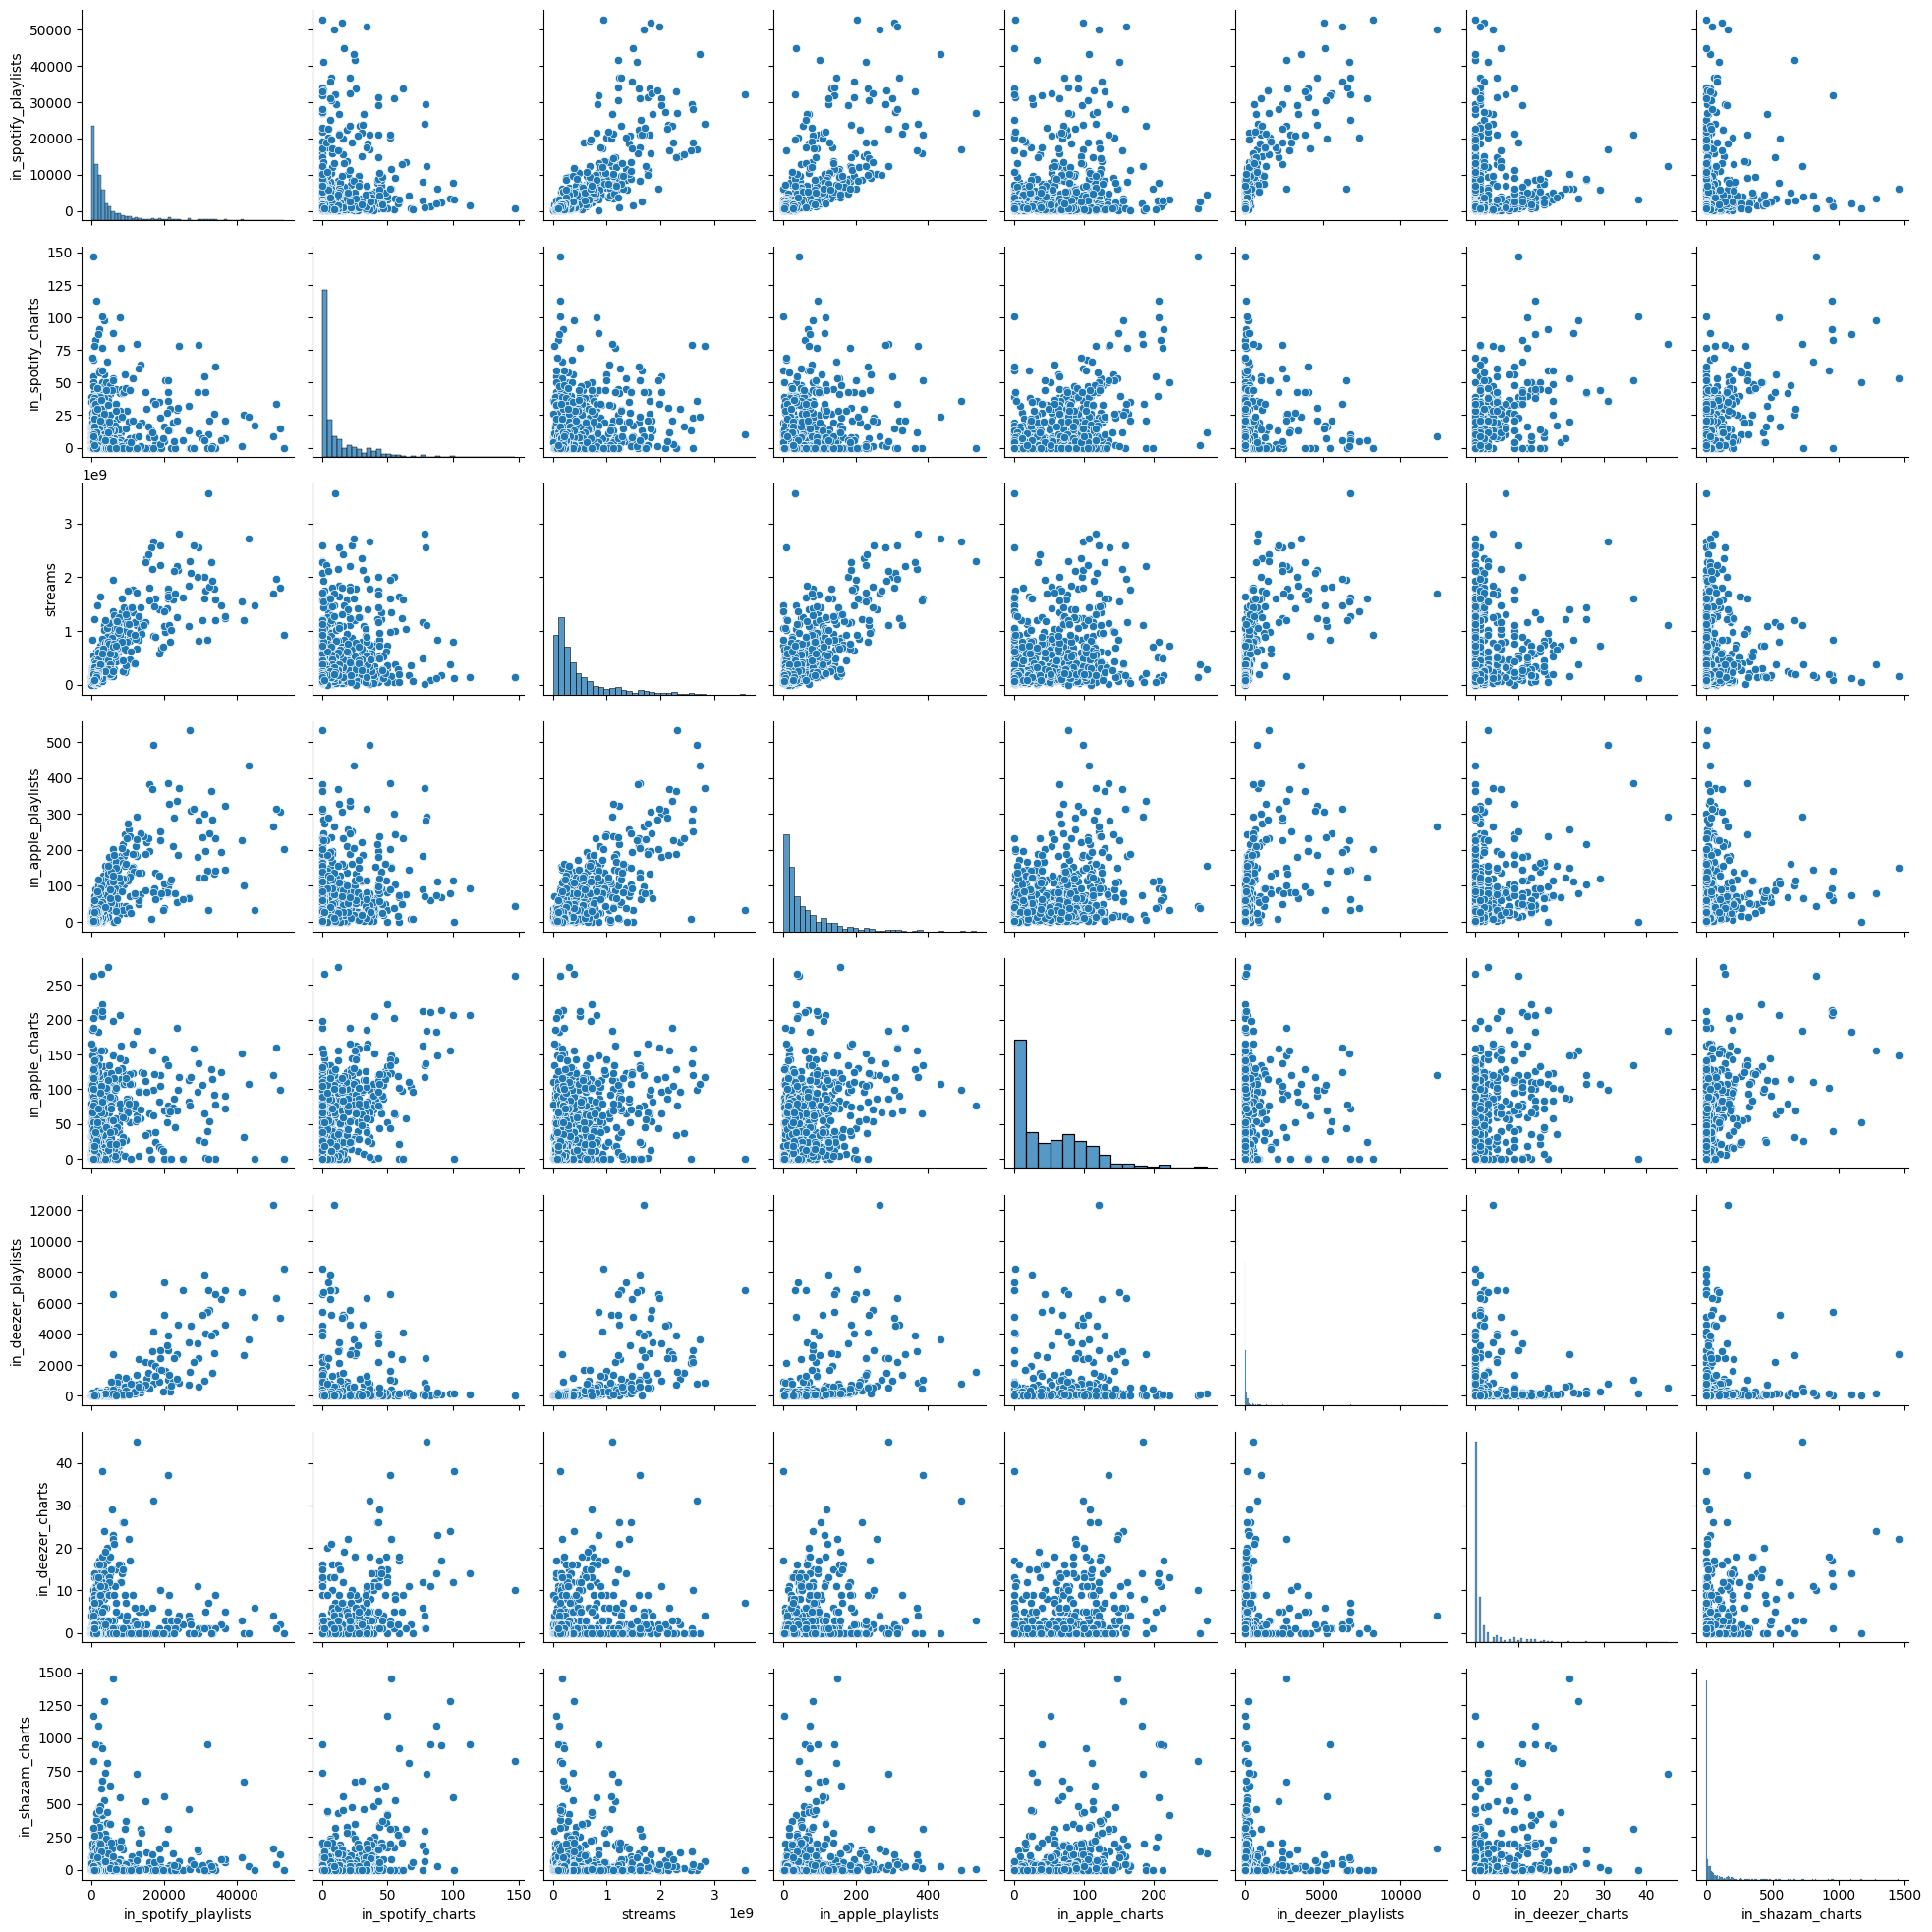

In [ ]:
import seaborn as sns

sns.pairplot(df_cuant)

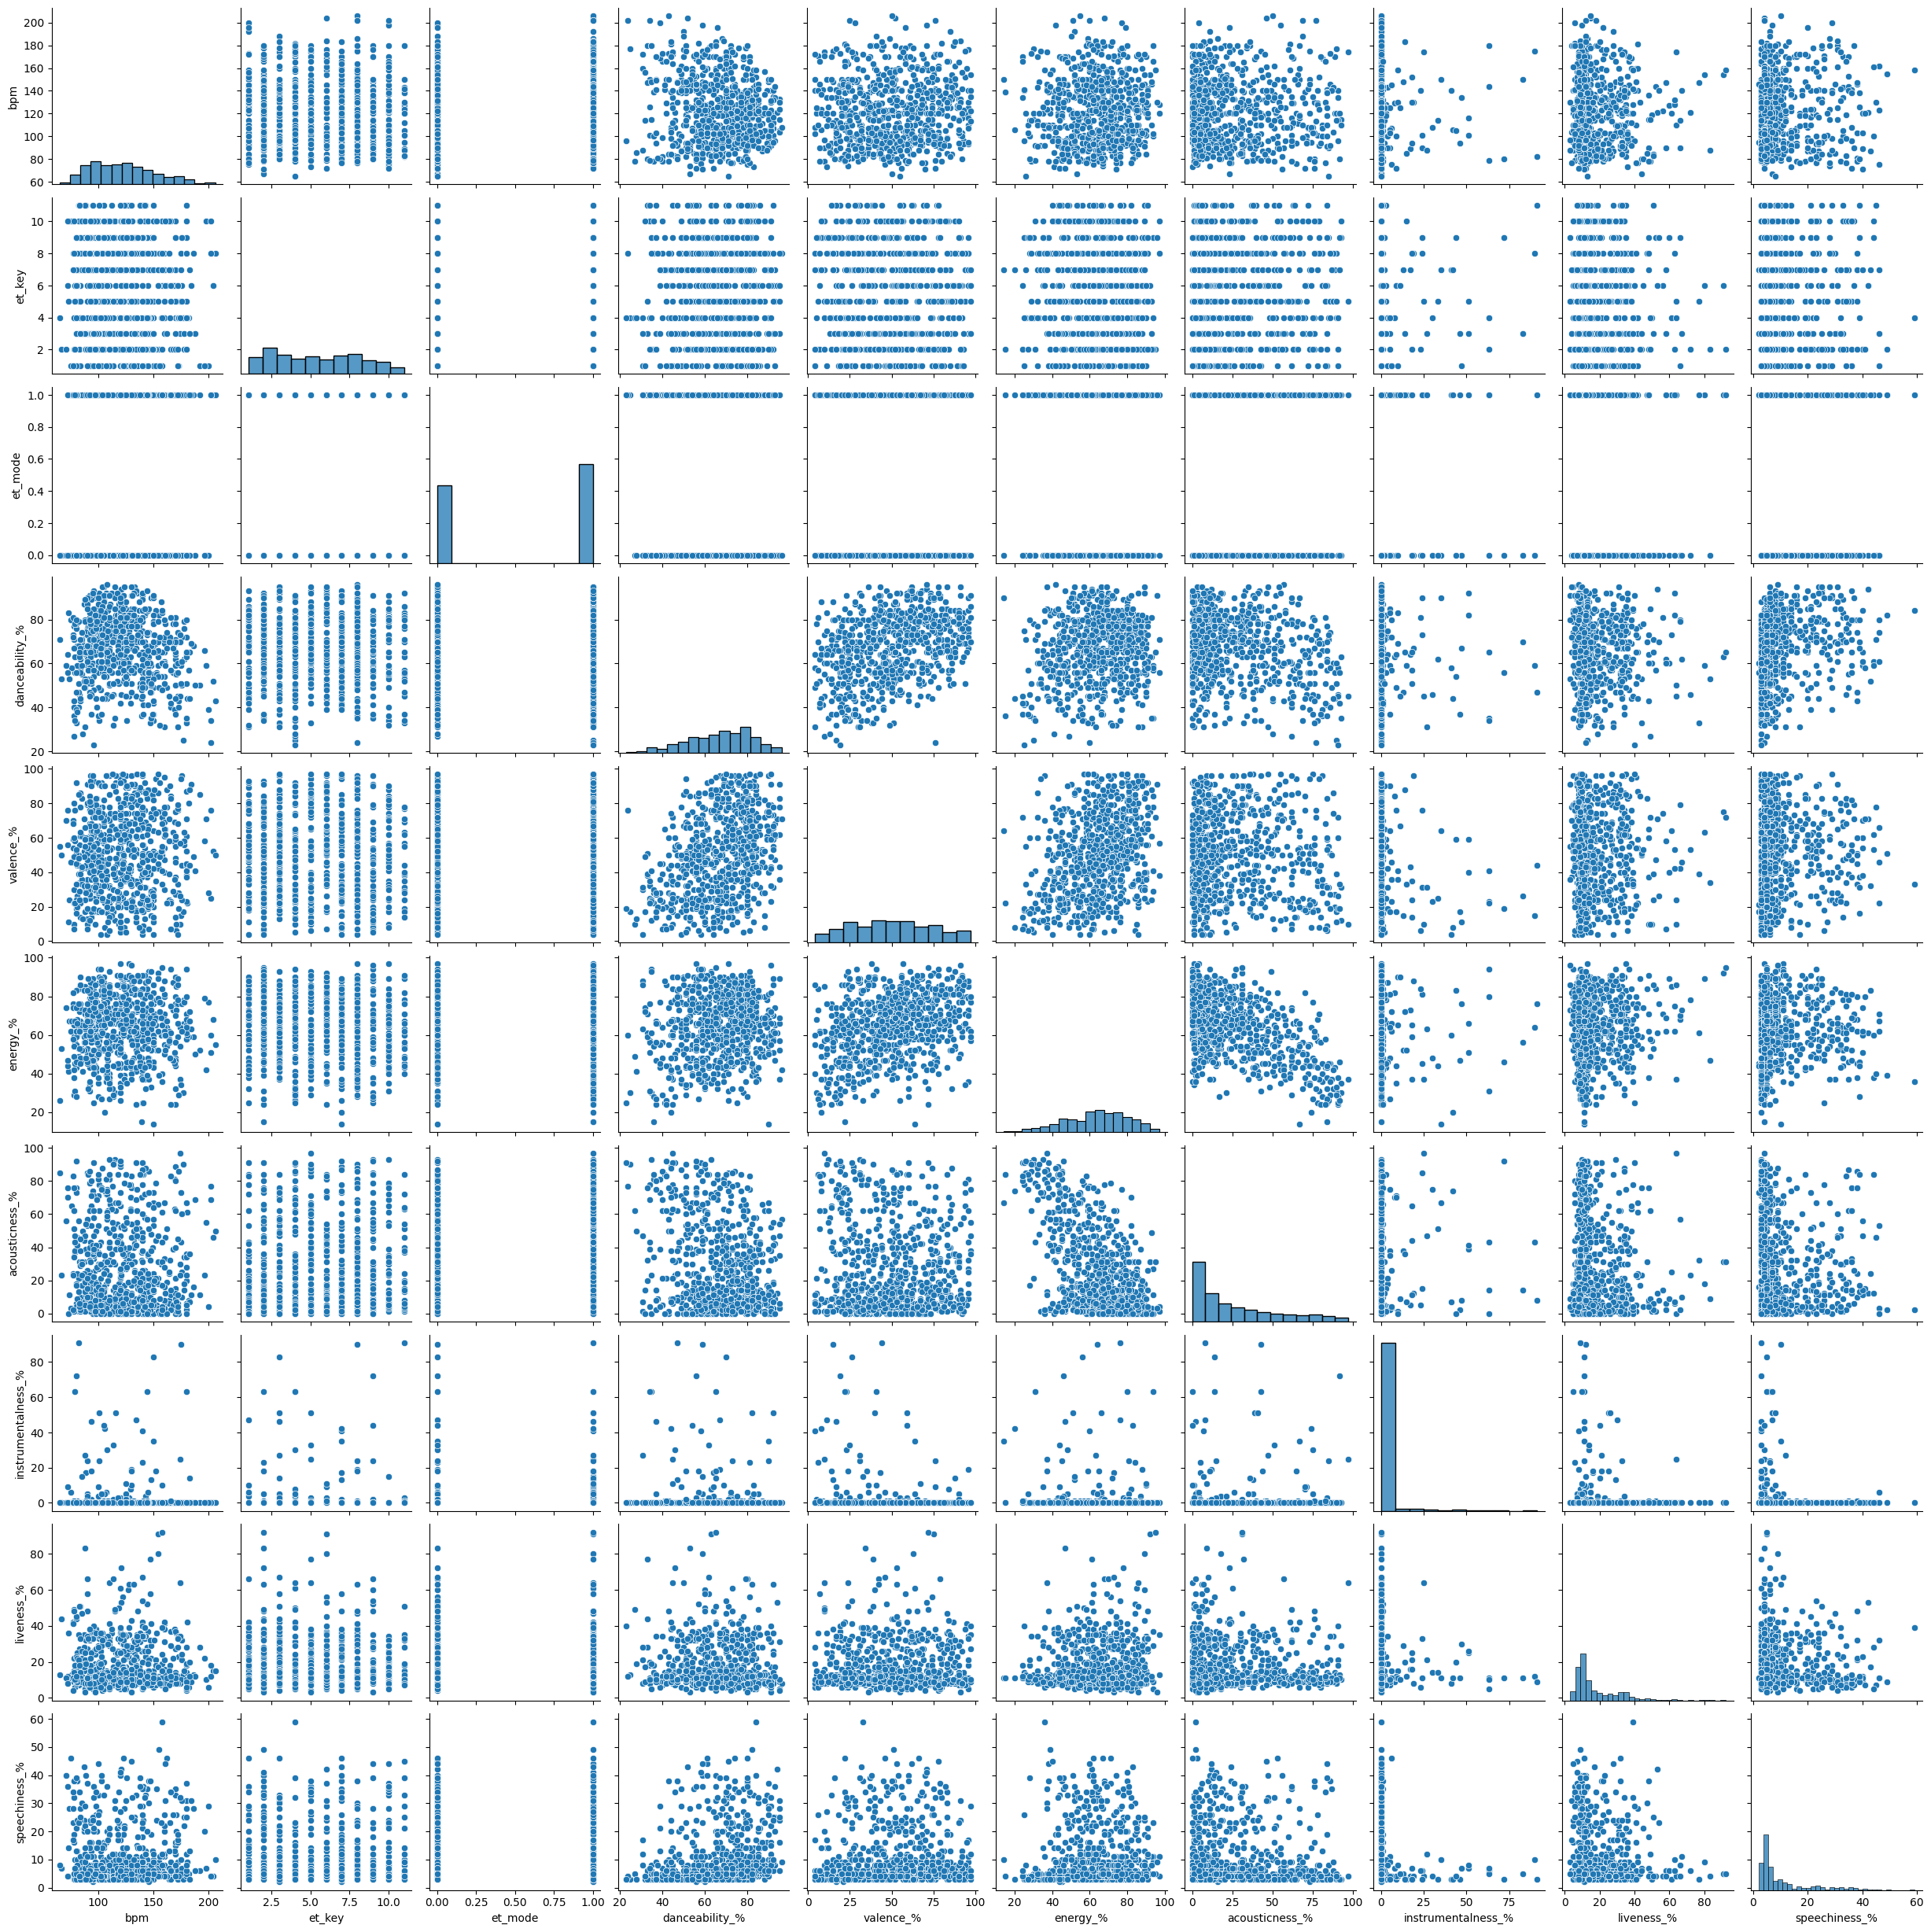

In [ ]:
sns.pairplot(df_cualit)

Nótese que no existe correlación normal (los histogramas parecen no seguir una distribución normal). Por ende, es conveniente usar el coeficiente de correlación de Spearman:

## Matriz de correlación spearman

<Axes: >

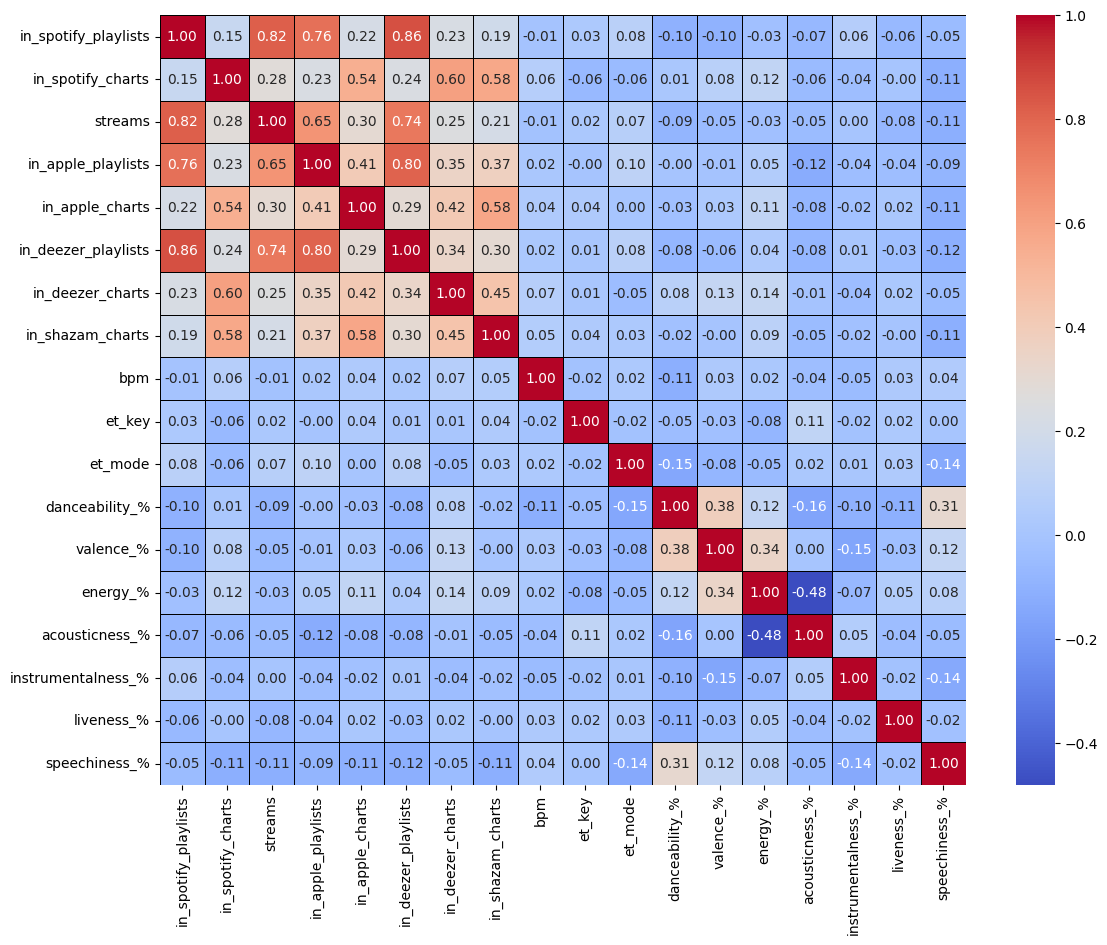

In [ ]:
# Extraemos todas las columnas numericas para obtener la correlacion
df_analysis = df[["in_spotify_playlists",
                  "in_spotify_charts",
                  "streams",
                  "in_apple_playlists",
                  "in_apple_charts",
                  "in_deezer_playlists",
                  "in_deezer_charts",
                  "in_shazam_charts",
                  "bpm",
                  "et_key",
                  "et_mode",
                  "danceability_%",
                  "valence_%",
                  "energy_%",
                  "acousticness_%",
                  "instrumentalness_%",
                  "liveness_%",
                  "speechiness_%"]]
df_corr = df_analysis.corr(method = 'spearman')
# cont_corr

fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            xticklabels = df_corr.columns,
            yticklabels = df_corr.columns,
            annot = True,       # Muestra el valor numérico en cada celda
            fmt = '.2f',        # Formato para mostrar 2 decimales
            linewidths = 0.5,   # Opcional: añade líneas entre celdas para claridad
            linecolor = 'black')

Primero observemos que los datos cuantitativos de las plataformas muestran una **mayor correlación positiva** entre ellos que con los demás datos, pues no son datos intrínsecos de la canción

# Recomendación canciones con KNN


## Preprocesamiento features

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Definimos columnas numéricas base (Audio Features)
numeric_cols = [
    'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm'
]

# Generamos Dummies (One-Hot Encoding) para Key y Mode
dummies_key_mode = pd.get_dummies(df[['key', 'mode']])
dummies_key_mode.head()


,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,False,False,True,False,False,False,False,False,False,False,False,True,False
1,False,False,False,True,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,False,False,True


Creamos dummies para artistas, pero primero obtenemos la lista de artistas unicos

In [ ]:
# Obtengamos todos los artistas de artist(s) name
norm_artists_list = []
for artist in df['normalized_artist_name'].unique():
    #Imprime cada artista de la cancion (separado por coma)
    artists = artist.split(',')
    for artist in artists:
        norm_artists_list.append(artist.strip())
norm_artists_list = list(set(norm_artists_list))

map_artist_id = {artist: idx for idx, artist in enumerate(norm_artists_list)}
map_id_artist = {idx: artist for idx, artist in enumerate(norm_artists_list)}
print(len(norm_artists_list),map_artist_id)
#


552 {'nayeon': 0, 'standly': 1, 'gurinder gill': 2, 'sampha': 3, 'myke towers': 4, 'lasso': 5, 'ludwig goransson': 6, 'grayson vill': 7, 'harry styles': 8, 'dj escobar': 9, 'mc menor hr': 10, 'aap rocky': 11, 'manuel turizo': 12, 'cartel de santa': 13, 'madonna': 14, 'eric church': 15, 'agroplay': 16, 'young thug': 17, 'burna boy': 18, '4town from disney and pixari¿½i¿½i¿½s turning red': 19, 'la adictiva': 20, 'agust d': 21, 'anderson paak': 22, 'danny ocean': 23, 'bei¿½i': 24, 'chris rea': 25, 'fmk': 26, 'roisee': 27, 'blanco': 28, 'grupo frontera': 29, 'mc pedrinho': 30, 'ha sung woon': 31, 'jay rock': 32, 'thxsomch': 33, 'kendrick lamar': 34, 'kenia os': 35, 'eladio carrion': 36, 'surf curse': 37, 'mabel matiz': 38, 'musical youth': 39, 'paloma faith': 40, 'yung gravy': 41, 'ariana grande': 42, 'miguel': 43, 'jax jones': 44, 'bebe rexha': 45, 'ella henderson': 46, 'amitabh bhattacharya': 47, 'steve lacy': 48, 'joji': 49, 'mc vitin da igrejinha': 50, 'calvin harris': 51, 'shilpa rao'

Ahora creamos una columna por artista y por cada fila marcamos como true si el artista colaboro en la cancion

In [ ]:
# Crear columnas artist_0, artist_1,...,artist_551
cols = [f'artist_{i}' for i in range(len(norm_artists_list))]
dummies_artists = pd.DataFrame(columns=cols)

# Crear una columna por artista como
for ind in df.index:
    artists = df.loc[ind, 'normalized_artist_name'].split(',')
    artists = [artist.strip() for artist in artists]

    # print(ind, artists)
    # print("----> ",end=" ")
    founds = []
    for i in range(len(norm_artists_list)):
        artist_i = map_id_artist[i].strip()

        if artist_i in artists:
            # print(f"{artist_i}",end=", ")
            founds.append(artist_i)
            dummies_artists.at[ind, f'artist_{i}'] = True
        else:
            dummies_artists.at[ind, f'artist_{i}'] = False
    # print()
    if(set(founds) != set(artists)):
        print(ind, artists)
        print("----> ",end=" ")
        print(founds)

dummies_artists.head()


,artist_0,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9,...,artist_542,artist_543,artist_544,artist_545,artist_546,artist_547,artist_548,artist_549,artist_550,artist_551
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Escalado de Numéricas (necesario para que bpm no domine)
scaler = MinMaxScaler()
df_scaled_numeric = pd.DataFrame(
    scaler.fit_transform(df[numeric_cols]),
    columns=numeric_cols,
    index=df.index
)


Se decidio hacer la recomendación con dos conjuntos de datos para probar que metodo brinda mejores resultados.
1. **Datos numericos cancion + key,mode (OHE) + artistas(OHE)**: Se busca que se hagan recomendaciones en las que el artista influya en la recomensación, pero no lo tomamos como final ya que agregar estas columnas hace el conjunto muy disperso podiendo afectar el rendimiento y la predicción
2. **Datos numericos cancion + key,mode (OHE)**: Aqui se mediran los resultados únicamente con las caracteristicas cualitativas de la canción

## KNN con artistas

In [ ]:
# Dataset Cualitativas + Artistas
X_con_artistas = pd.concat([df_scaled_numeric, dummies_key_mode, dummies_artists], axis=1)
print(f"Dimensiones Matriz con Artistas: {X_con_artistas.shape}")


Dimensiones Matriz con Artistas: (725, 573)


In [ ]:
from sklearn.neighbors import NearestNeighbors
nbrs_df1 = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(X_con_artistas)
distances_df1, indices_df1 = nbrs_df1.kneighbors(X_con_artistas)

In [ ]:
distances_df1[100], indices_df1[100]

(array([0.        , 1.4648261 , 1.46557425, 1.46646449, 1.46669469,
        1.47099738]),
 array([100, 517,  70, 342, 272, 438]))

# KNN sin artistas

In [ ]:
# Dataset solo cualitativas
X_sin_artistas = pd.concat([df_scaled_numeric, dummies_key_mode], axis=1)
print(f"Dimensiones Matriz sin Artistas: {X_sin_artistas.shape}")

from sklearn.neighbors import NearestNeighbors
nbrs_df2 = NearestNeighbors(n_neighbors=6, algorithm='brute').fit(X_sin_artistas)
distances_df2, indices_df2 = nbrs_df2.kneighbors(X_sin_artistas)

Dimensiones Matriz sin Artistas: (725, 21)


# KNN después de PCA

## Aplicamos PCA al dataset
** Estandarizamos los datos **

In [ ]:
from sklearn.preprocessing import StandardScaler

# Usamos las mismas columnas numéricas
cols_to_process = ['bpm', 'danceability_%', 'valence_%', 'energy_%',
                   'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Instanciamos el StandardScaler
scaler_std = StandardScaler()

# Ajustamos y transformamos los datos originales
X_std = scaler_std.fit_transform(df[cols_to_process])

print("Datos estandarizados. Media aprox 0, Std aprox 1.")

Datos estandarizados. Media aprox 0, Std aprox 1.


**Análisis de Varianza**

Para decidir a cuantas componentes reducirlo

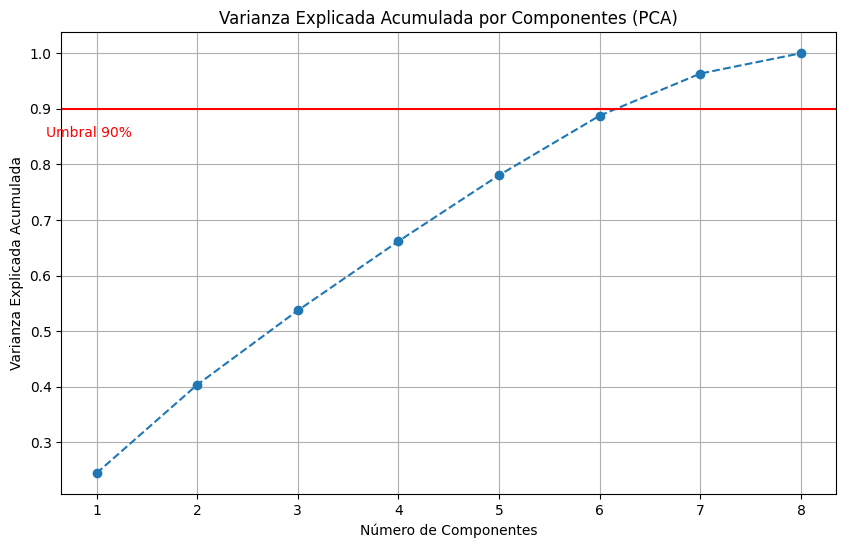

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Instanciamos PCA sin limitar componentes
pca_test = PCA()
pca_test.fit(X_std)

# Varianza explicada acumulada
evr_acumulada = np.cumsum(pca_test.explained_variance_ratio_)

# Gráfico de codo (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(evr_acumulada) + 1), evr_acumulada, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes (PCA)')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='-') # Línea de referencia al 90%
plt.text(0.5, 0.85, 'Umbral 90%', color = 'red')
plt.show()

Vemos que con 6 componentes ya tenemos el 90% de la información

In [ ]:
pca_final = PCA(n_components=6)

# Transformamos los datos
X_pca = pca_final.fit_transform(X_std)

print(f"Dimensiones originales: {X_std.shape[1]}")
print(f"Dimensiones reducidas (PCA): {X_pca.shape[1]}")

# Creamos un DataFrame para visualizar mejor los resultados
cols_pca = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(data=X_pca, columns=cols_pca)

# (Opcional) Unimos con los datos del artista/canción para referencia visual
df_pca_final = pd.concat([df[['track_name', 'artist(s)_name']].reset_index(drop=True), df_pca], axis=1)

df_pca_final.head()

Dimensiones originales: 8
Dimensiones reducidas (PCA): 6


,track_name,artist(s)_name,PC1,PC2,PC3,PC4,PC5,PC6
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",1.569714,0.373078,-0.375354,-0.585369,-1.579131,0.173633
1,LALA,Myke Towers,0.972205,-0.123455,-1.179811,0.235915,-0.477513,-0.677507
2,vampire,Olivia Rodrigo,-0.996504,-1.137069,0.827279,0.473931,0.284209,-0.221690
3,Cruel Summer,Taylor Swift,0.356482,-0.559767,1.278198,-1.468241,0.028657,-0.393493
4,WHERE SHE GOES,Bad Bunny,-1.169033,-2.712384,-3.274416,-3.506603,1.726817,3.494280


## Aplicamos KNN al dataframde despues de PCA

In [ ]:
from sklearn.neighbors import NearestNeighbors
nbrs_pca = NearestNeighbors(n_neighbors=6, algorithm='brute').fit(df_pca)
distances_pca, indices_pca = nbrs_pca.kneighbors(df_pca)

In [ ]:
for idx in df.index:
    for idx_rec in indices_pca[idx]:
        if idx_rec not in indices_pca[idx]:
            print(idx_rec, df.iloc[idx]['track_name'])

    print()

# Función recomendación


Funciones que ayudan a buscar cancion

In [ ]:
nombres_canciones = list(df.normalized_track_name.values)
nombres_artistas = list(df.normalized_artist_name.values)
def imprimir_id_por_nombre_parcial(name):
    name = normalize_string(name)
    print(f"\n\nCanciones con nombre parcial {name}:")
    cont = 0
    for cancion in nombres_canciones:
        if name in cancion:
            cont += 1
            idx = nombres_canciones.index(cancion)
            song = df.iloc[idx]["track_name"]
            art = df.iloc[idx]["artist(s)_name"]
            print(f"id:{idx} --> {song} - {art}")
    for artista in nombres_artistas:
        if name in artista:
            cont += 1
            idx = nombres_artistas.index(artista)
            song = df.iloc[idx]["track_name"]
            art = df.iloc[idx]["artist(s)_name"]
            print(f"id:{idx} --> {song} - {art}")
    print()
    if cont == 0:
        print("No se encontraron canciones con ese nombre parcial")
    return cont

def obtener_indice_por_nombre(name):
    name = normalize_string(name)
    return df[df["normalized_track_name"]==name].index.tolist()[0]

def obtiene_nombre_por_id(id):
    return df.iloc[id]["track_name"]

""" print_similar_query busca canciones similares por id y por nombre """

def print_similar_songs(query=None,id=None,base=1):

    if id:
        query = obtiene_nombre_por_id(id)
        query_singer = df.iloc[id]["artist(s)_name"]
    else:
        id = obtener_indice_por_nombre(query)
        query_singer = df.iloc[id]["artist(s)_name"]
    print(f"\n\nCanciones similares a: {query} - {query_singer}")
    if base == 1:
        print("\n ----Escenario: KNN Con Artistas ---- \n")
        distances = distances_df1
        indices = indices_df1
    elif base == 2:
        print("\n ----Escenario: KNN Sin Artistas ---- \n")
        distances = distances_df2
        indices = indices_df2
    elif base == 3:
        print("\n ----Escenario: KNN Con PCA ---- \n")
        distances = distances_pca
        indices = indices_pca
    else:
        print("Error: df debe ser 1, 2 o 3")
        return


    if id:
        cnt = 1
        for id in indices[id][1:]:
            artistas = df.iloc[id]["artist(s)_name"]
            cancion = df.iloc[id]["track_name"]
            print(f"\tRecomendación {cnt} --> {cancion} - {artistas}")
            cnt += 1
        return indices[id][1:]
    if query:
        cnt = 1
        found_id = obtener_indice_por_nombre(query)
        for id in indices[found_id][1:]:
            artistas = df.iloc[id]["artist(s)_name"]
            cancion = df.iloc[id]["track_name"]
            print(f"\tRecomendación {cnt} --> {cancion} - {artistas}")
            cnt += 1
        return indices[found_id][1:]
    return None



In [ ]:
# Cancion
cancion = "Ella baila sola"

# Caso 1: Con Artistas (muchas columnas)
print_similar_songs(cancion, base=1)

# Caso 2: Sin Artistas (menos columnas)
print_similar_songs(cancion, base=2)
# Caso 3: Despues de PCA
print_similar_songs(cancion, base=3)




Canciones similares a: Ella baila sola - Eslabon Armado, Peso Pluma

 ----Escenario: KNN Con Artistas ---- 

	Recomendación 1 --> Peso Pluma: Bzrp Music Sessions, Vol. 55 - Bizarrap, Peso Pluma
	Recomendación 2 --> TQM - Fuerza Regida
	Recomendación 3 --> LADY GAGA - Gabito Ballesteros, Junior H, Peso Pluma
	Recomendación 4 --> Antes de Perderte - Duki
	Recomendación 5 --> Super Shy - NewJeans


Canciones similares a: Ella baila sola - Eslabon Armado, Peso Pluma

 ----Escenario: KNN Sin Artistas ---- 

	Recomendación 1 --> Obsessed - Abhijay Sharma, Riar Saab
	Recomendación 2 --> TQM - Fuerza Regida
	Recomendación 3 --> Peso Pluma: Bzrp Music Sessions, Vol. 55 - Bizarrap, Peso Pluma
	Recomendación 4 --> LADY GAGA - Gabito Ballesteros, Junior H, Peso Pluma
	Recomendación 5 --> Antes de Perderte - Duki


Canciones similares a: Ella baila sola - Eslabon Armado, Peso Pluma

 ----Escenario: KNN Con PCA ---- 

	Recomendación 1 --> El Azul - Junior H, Peso Pluma
	Recomendación 2 --> En El R

array([610, 583, 270,  32,  11])

In [ ]:
def buscar_cancion(evalua=False):
    while(True):
        # Pedir nombre de cancion
        resultados = 0
        while (resultados == 0):
            cancion_parcial = input("Nombre parcial cancion a buscar (salir): ")
            resultados = imprimir_id_por_nombre_parcial(cancion_parcial)
            if cancion_parcial == "salir":
                break

        id = int(input("Ingrese id de cancion: (-1 buscar otra cancion, -2 salir) "))
        if(id == -1):
            continue
        elif(id == -2):
            break
        else:
            if(evalua):
                evaluar_coherencia_recomendaciones(id, base_model=1)
                evaluar_coherencia_recomendaciones(id, base_model=2)
                evaluar_coherencia_recomendaciones(id, base_model=3)
            else:
                print_similar_songs(id=id, base=1)
                print_similar_songs(id=id, base=2)
                print_similar_songs(id=id, base=3)
            break


In [ ]:
buscar_cancion()

Nombre parcial cancion a buscar (salir): shallow


Canciones con nombre parcial shallow:
id:468 --> Shallow - Lady Gaga, Bradley Cooper

Ingrese id de cancion: (-1 buscar otra cancion, -2 salir) 468


Canciones similares a: Shallow - Lady Gaga, Bradley Cooper

 ----Escenario: KNN Con Artistas ---- 

	Recomendación 1 --> Hold My Hand - Lady Gaga
	Recomendación 2 --> Something in the Orange - Zach Bryan
	Recomendación 3 --> Komang - Raim Laode
	Recomendación 4 --> we fell in love in october - girl in red
	Recomendación 5 --> Love Of My Life - Harry Styles


Canciones similares a: Shallow - Lady Gaga, Bradley Cooper

 ----Escenario: KNN Sin Artistas ---- 

	Recomendación 1 --> Something in the Orange - Zach Bryan
	Recomendación 2 --> Brividi - Mahmood, Blanco
	Recomendación 3 --> Komang - Raim Laode
	Recomendación 4 --> we fell in love in october - girl in red
	Recomendación 5 --> Love Of My Life - Harry Styles


Canciones similares a: Shallow - Lady Gaga, Bradley Cooper

 ----Escenario: 

# Evaluando modelos


## Funciones para evaluar las recomendaciones

1. Función para Evaluar Distancias (analizar_distancias_knn)


Esta función toma las distancias que devuelve el modelo KNN.
- Qué buscamos: Distancias cortas (cercanía) y una desviación estándar razonable.
- Alerta: Si la desviación estándar es muy cercana a 0, significa que todos los puntos están "igual de lejos", lo cual suele pasar cuando hay demasiadas dimensiones (curse of dimensionality) o el modelo no distingue bien.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_distancias_knn(distances):
    """
    Analiza la distribución de las distancias de los vecinos cercanos.

    Args:
        distances (array): Arreglo de distancias devuelto por kneighbors().
    """
    # Aplanamos el array por si viene en formato (1, k)
    dist_flat = distances.flatten()

    # Cálculos estadísticos
    media = np.mean(dist_flat)
    min_dist = np.min(dist_flat)
    max_dist = np.max(dist_flat)
    std_dev = np.std(dist_flat)

    print(f"--- Análisis de Distancias ---")
    print(f"Distancia Mínima: {min_dist:.4f} (El más similar)")
    print(f"Distancia Máxima: {max_dist:.4f} (El menos similar de los recomendados)")
    print(f"Promedio: {media:.4f}")
    print(f"Desviación Estándar: {std_dev:.4f}")

    # Interpretación básica
    if std_dev < 0.001:
        print("⚠️ ALERTA: La desviación es casi nula. Las distancias son uniformes (posible 'maldición de la dimensionalidad').")
    elif media > 100: # El umbral depende de tu escalado, ajusta este valor según tus datos
        print("⚠️ ALERTA: Las distancias promedio son muy altas. Revisa el escalado de datos.")
    else:
        print("✅ La dispersión de distancias parece saludable.")

    # Visualización
    plt.figure(figsize=(8, 4))
    sns.histplot(dist_flat, kde=True, bins=10, color='skyblue')
    plt.title('Distribución de Distancias de los Vecinos Encontrados')
    plt.xlabel('Distancia')
    plt.ylabel('Frecuencia')
    plt.show()

--- Análisis de Distancias ---
Distancia Mínima: 0.0000 (El más similar)
Distancia Máxima: 3.0691 (El menos similar de los recomendados)
Promedio: 1.3309
Desviación Estándar: 0.6618
✅ La dispersión de distancias parece saludable.


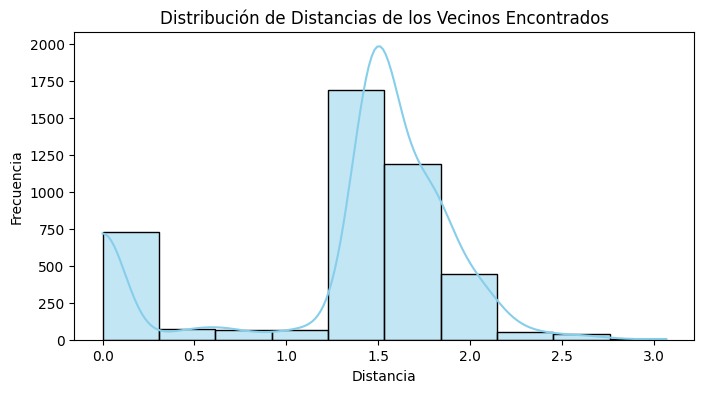

In [ ]:
analizar_distancias_knn(distances_df1)

--- Análisis de Distancias ---
Distancia Mínima: 0.0000 (El más similar)
Distancia Máxima: 1.2609 (El menos similar de los recomendados)
Promedio: 0.3699
Desviación Estándar: 0.2178
✅ La dispersión de distancias parece saludable.


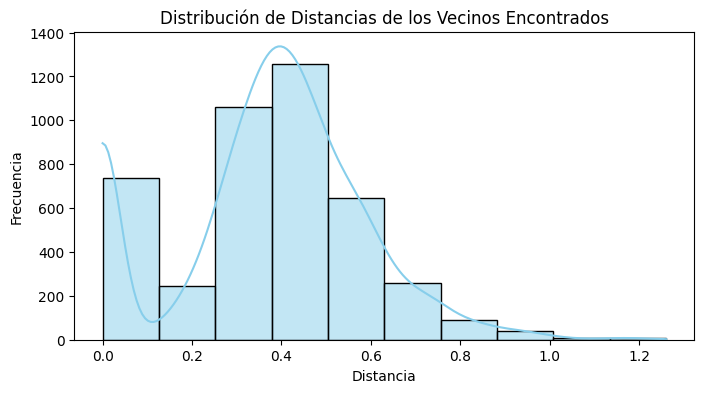

In [ ]:
analizar_distancias_knn(distances_df2)

--- Análisis de Distancias ---
Distancia Mínima: 0.0000 (El más similar)
Distancia Máxima: 4.4517 (El menos similar de los recomendados)
Promedio: 0.7832
Desviación Estándar: 0.5730
✅ La dispersión de distancias parece saludable.


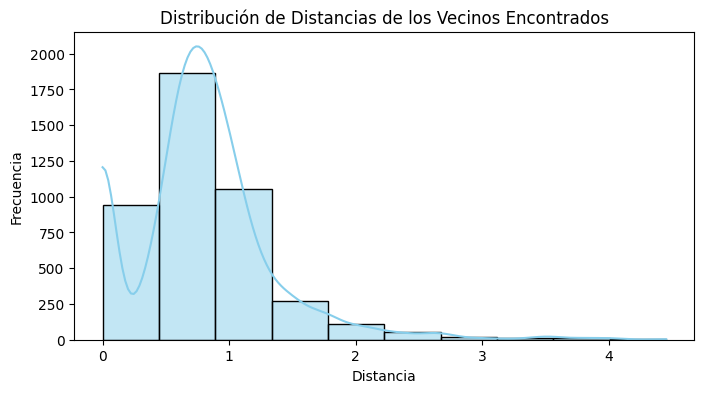

In [ ]:
analizar_distancias_knn(distances_pca)

2. Función de Coherencia de Características (evaluar_coherencia_recomendaciones)

Esta función compara las características de audio "reales" (BPM, Energy, Danceability) de la canción original vs. el promedio de las canciones recomendadas.

In [ ]:
def evaluar_coherencia_recomendaciones(song_id, base_model=1):
    """
    Verifica si las recomendaciones tienen características coherentes con la entrada.

    Args:
        song_id: Índice o ID de la canción en el DataFrame original.
        base_model: 1 (con artistas), 2 (sin artistas), 3 (PCA).
    """

    # 1. Selección del Modelo y Datos correspondientes
    if base_model == 1:
        model = nbrs_df1
        data_source = X_con_artistas
        title = "Modelo 1: KNN con Artistas"

    elif base_model == 2:
        model = nbrs_df2
        data_source = X_sin_artistas
        title = "Modelo 2: KNN sin Artistas"
    elif base_model == 3:
        model = nbrs_pca
        data_source = df_pca
        title = "Modelo 3: KNN con PCA"
    else:
        print("Opción de modelo no válida")
        return

    features_to_check = ['bpm', 'energy_%', 'danceability_%', 'valence_%', 'acousticness_%']

    # Datos de la canción original
    original_stats = df.iloc[song_id][features_to_check]

    # Datos de las recomendaciones (excluyendo la canción misma que suele ser el primer vecino)
    neighbor_indices = print_similar_songs(id=song_id, base=base_model)
    reco_stats = df.iloc[neighbor_indices][features_to_check]
    reco_mean = reco_stats.mean()

    # 4. Cálculo del Error (Diferencia promedio)
    diff = np.abs(original_stats - reco_mean)

    print(f"\n--- Coherencia de Características ({title}) ---")
    comparativa = pd.DataFrame({
        'Original': original_stats,
        'Promedio Recomendado': reco_mean,
        'Diferencia (Abs)': diff
    })
    display(comparativa)

    # 5. Visualización Comparativa
    indices_x = np.arange(len(features_to_check))
    width = 0.35

    plt.figure(figsize=(10, 5))
    plt.bar(indices_x - width/2, original_stats, width, label='Original', color='blue', alpha=0.7)
    plt.bar(indices_x + width/2, reco_mean, width, label='Promedio Recomendados', color='orange', alpha=0.7)

    plt.title(f'Comparación de Audio Features: {df.iloc[song_id]["track_name"]}')
    plt.xticks(indices_x, features_to_check)
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()



Canciones similares a: un x100to - Bad Bunny, Grupo Frontera

 ----Escenario: KNN Con Artistas ---- 

	Recomendación 1 --> Aguacero - Bad Bunny
	Recomendación 2 --> MOJABI GHOST - Tainy, Bad Bunny
	Recomendación 3 --> The Color Violet - Tory Lanez
	Recomendación 4 --> La Zona - Bad Bunny
	Recomendación 5 --> Maan Meri Jaan - King

--- Coherencia de Características (Modelo 1: KNN con Artistas) ---


,Original,Promedio Recomendado,Diferencia (Abs)
bpm,83,110.2,27.2
energy_%,72,67.6,4.4
danceability_%,57,80.2,23.2
valence_%,56,51.0,5.0
acousticness_%,23,17.6,5.4


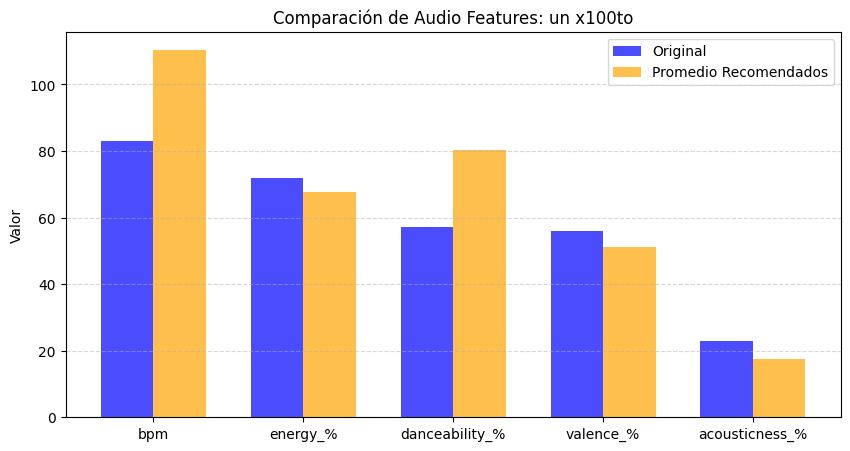

In [ ]:
evaluar_coherencia_recomendaciones(10, base_model=1)



Canciones similares a: un x100to - Bad Bunny, Grupo Frontera

 ----Escenario: KNN Sin Artistas ---- 

	Recomendación 1 --> The Color Violet - Tory Lanez
	Recomendación 2 --> SORRY NOT SORRY - Tyler, The Creator
	Recomendación 3 --> Maan Meri Jaan - King
	Recomendación 4 --> Es un Secreto - Plan B
	Recomendación 5 --> Escapism. - Sped Up - RAYE, 070 Shake

--- Coherencia de Características (Modelo 2: KNN sin Artistas) ---


,Original,Promedio Recomendado,Diferencia (Abs)
bpm,83,110.4,27.4
energy_%,72,70.4,1.6
danceability_%,57,60.6,3.6
valence_%,56,41.4,14.6
acousticness_%,23,16.0,7.0


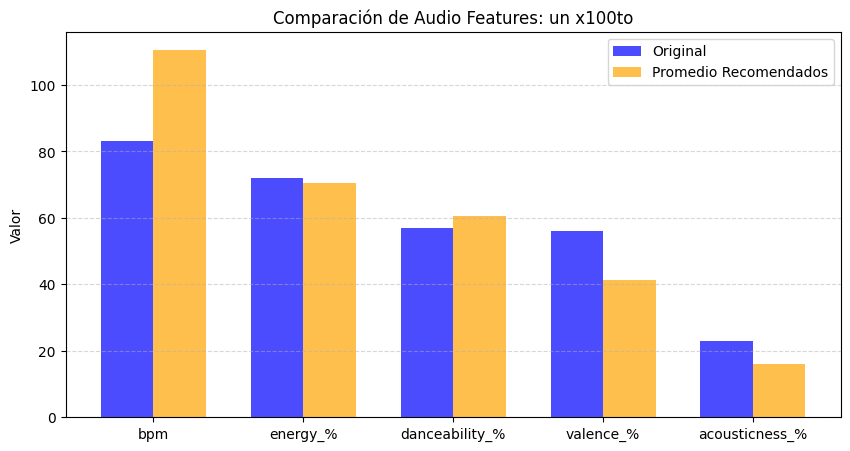

In [ ]:
evaluar_coherencia_recomendaciones(10, base_model=2)



Canciones similares a: un x100to - Bad Bunny, Grupo Frontera

 ----Escenario: KNN Con PCA ---- 

	Recomendación 1 --> Take Two - BTS
	Recomendación 2 --> Cheques - Shubh
	Recomendación 3 --> Bar - Tini, L-Gante
	Recomendación 4 --> Anti-Hero - Taylor Swift
	Recomendación 5 --> F2F - SZA

--- Coherencia de Características (Modelo 3: KNN con PCA) ---


,Original,Promedio Recomendado,Diferencia (Abs)
bpm,83,93.4,10.4
energy_%,72,73.4,1.4
danceability_%,57,59.0,2.0
valence_%,56,47.0,9.0
acousticness_%,23,12.8,10.2


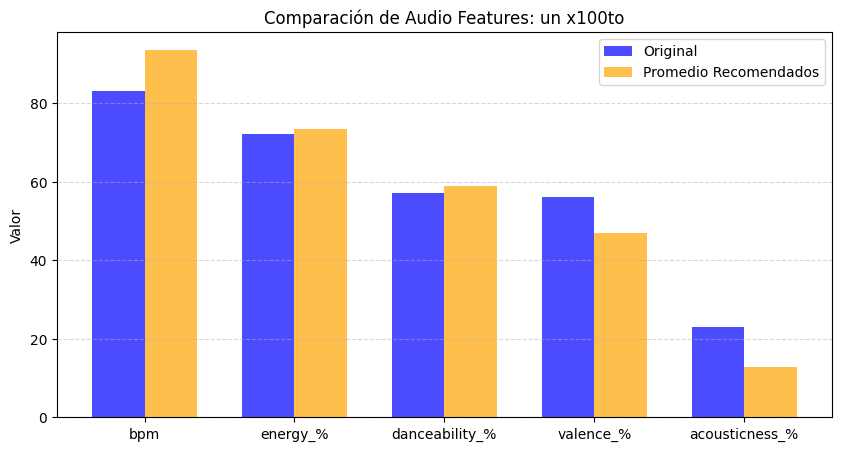

In [ ]:
evaluar_coherencia_recomendaciones(10, base_model=3)

### Grafica dos caracteristicas


In [ ]:
def grafica_similares_dos_caracteristicas(idx_song, caracteristicas, base_model=1):
    indices_similares = print_similar_songs(idx_song, base_model)
    distances = []
    if(base_model == 1):
        distances = distances_df1
    elif(base_model == 2):
        distances = distances_df2
    elif(base_model == 3):
        distances = distances_pca

    # Scatter


In [ ]:
import matplotlib.pyplot as plt

def grafica_similares_dos_caracteristicas(idx_song, caracteristicas, base_model=1):
    """
    Grafica la canción original y sus recomendaciones en un plano 2D,
    conectándolas con líneas.

    Args:
        idx_song (int): Índice de la canción original.
        caracteristicas (list): Lista con dos strings, ej: ['bpm', 'energy_%'].
        base_model (int): 1, 2 o 3 según el modelo deseado.
    """

    # 1. Obtener los índices de los vecinos usando tu función existente
    # Asegúrate de que print_similar_songs retorne una lista o array de índices
    indices_similares = print_similar_songs(idx_song, base_model)

    # Definir nombres de ejes
    x_col = caracteristicas[0]
    y_col = caracteristicas[1]

    # 2. Obtener coordenadas de la canción ORIGINAL
    x_origin = df.iloc[idx_song][x_col]
    y_origin = df.iloc[idx_song][y_col]
    nombre_origin = df.iloc[idx_song]['track_name']

    # 3. Obtener coordenadas de las RECOMENDACIONES
    # Filtramos para no dibujar una línea de la canción a sí misma si aparece en la lista
    vecinos_df = df.iloc[indices_similares]

    # Configuración de la figura
    plt.figure(figsize=(10, 6))

    # --- A. DIBUJAR LÍNEAS (Conexiones) ---
    # Iteramos sobre cada vecino para dibujar una línea desde el origen hasta el vecino
    for _, row in vecinos_df.iterrows():
        x_vecino = row[x_col]
        y_vecino = row[y_col]

        # Dibujamos línea gris punteada
        plt.plot([x_origin, x_vecino], [y_origin, y_vecino],
                 c='gray', linestyle='--', alpha=0.5, zorder=1)

    # --- B. DIBUJAR PUNTOS (Scatter) ---
    # Puntos de los vecinos
    plt.scatter(vecinos_df[x_col], vecinos_df[y_col],
                c='skyblue', s=100, label='Recomendadas', edgecolors='blue', zorder=2)

    # Punto de la canción original (Destacado)
    plt.scatter(x_origin, y_origin,
                c='red', s=200, marker='*', label='Original', zorder=3)

    # --- C. ANOTACIONES (Nombres de canciones) ---
    # Etiqueta para la original
    plt.text(x_origin, y_origin, f"  {nombre_origin}", fontsize=10, fontweight='bold', color='darkred')

    # Etiquetas para los vecinos
    for _, row in vecinos_df.iterrows():
        # Evitar sobreescribir el texto de la original si está muy cerca
        if row['track_name'] != nombre_origin:
            plt.text(row[x_col], row[y_col], f"  {row['track_name']}", fontsize=8, alpha=0.8)

    # Decoración del gráfico
    plt.title(f'Relación entre "{nombre_origin}" y sus recomendaciones\nModelo: {base_model}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)

    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Opcional, pero ayuda con los estilos

def grafica_similares_dos_caracteristicas(idx_song, caracteristicas, base_model=1):
    """
    Grafica todo el dataset de fondo, resaltando la canción original y sus recomendaciones
    con líneas de conexión.

    Args:
        idx_song (int): Índice de la canción original.
        caracteristicas (list): Lista con dos strings, ej: ['bpm', 'energy_%'].
        base_model (int): 1, 2 o 3 según el modelo deseado.
    """

    # 1. Obtener los índices de los vecinos
    indices_similares = print_similar_songs(id=idx_song,
                                            base=base_model)

    # Definir ejes
    x_col = caracteristicas[0]
    y_col = caracteristicas[1]

    # Datos de la canción ORIGINAL
    x_origin = df.iloc[idx_song][x_col]
    y_origin = df.iloc[idx_song][y_col]
    nombre_origin = df.iloc[idx_song]['track_name']

    # Datos de las RECOMENDACIONES
    vecinos_df = df.iloc[indices_similares]

    # Configuración de la figura
    plt.figure(figsize=(12, 7))

    # --- A. DIBUJAR TODO EL DATASET (Fondo) ---
    # Usamos un color gris muy claro y alta transparencia para que sea "ruido de fondo"
    # zorder=0 asegura que se dibuje al fondo de todo
    plt.scatter(df[x_col], df[y_col],
                c='lightgray', s=15, alpha=0.4, label='Resto del Dataset', zorder=0)

    # --- B. DIBUJAR LÍNEAS (Solo a los similares) ---
    for _, row in vecinos_df.iterrows():
        x_vecino = row[x_col]
        y_vecino = row[y_col]

        # Línea conectora
        plt.plot([x_origin, x_vecino], [y_origin, y_vecino],
                 c='gray', linestyle='--', linewidth=1, alpha=0.6, zorder=1)

    # --- C. DIBUJAR PUNTOS DESTACADOS ---
    # Puntos de los vecinos (zorder=2 para ir encima de las líneas)
    plt.scatter(vecinos_df[x_col], vecinos_df[y_col],
                c='dodgerblue', s=80, edgecolors='white', label='Recomendaciones', zorder=2)

    # Punto de la canción original (zorder=3 para ir hasta arriba)
    plt.scatter(x_origin, y_origin,
                c='red', s=180, marker='*', edgecolors='black', label='Original', zorder=3)

    # --- D. ANOTACIONES ---
    # Texto para la original
    plt.text(x_origin, y_origin, f"  {nombre_origin}",
             fontsize=10, fontweight='bold', color='darkred', zorder=4)

    # Texto para los vecinos (opcional: quitar si hay demasiados vecinos y se amontona)
    for _, row in vecinos_df.iterrows():
        if row['track_name'] != nombre_origin:
            plt.text(row[x_col], row[y_col], f"  {row['track_name']}",
                     fontsize=8, color='black', alpha=0.8, zorder=4)

    # Decoración
    plt.title(f'Mapa de Similitud: "{nombre_origin}" vs Universo de Canciones\n(Modelo {base_model})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(loc='best') # 'best' busca el lugar donde estorbe menos
    plt.grid(True, linestyle=':', alpha=0.3)

    plt.show()



Canciones similares a: un x100to - Bad Bunny, Grupo Frontera

 ----Escenario: KNN Con Artistas ---- 

	Recomendación 1 --> Aguacero - Bad Bunny
	Recomendación 2 --> MOJABI GHOST - Tainy, Bad Bunny
	Recomendación 3 --> The Color Violet - Tory Lanez
	Recomendación 4 --> La Zona - Bad Bunny
	Recomendación 5 --> Maan Meri Jaan - King


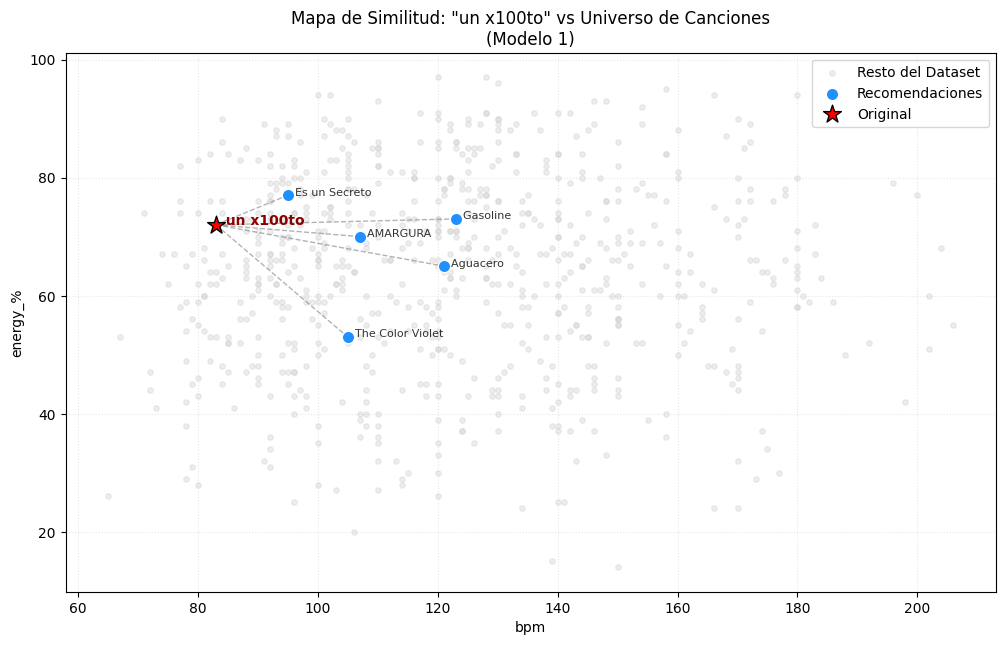

In [ ]:
grafica_similares_dos_caracteristicas(10, ['bpm', 'energy_%'], base_model=1)



Canciones similares a: un x100to - Bad Bunny, Grupo Frontera

 ----Escenario: KNN Sin Artistas ---- 

	Recomendación 1 --> The Color Violet - Tory Lanez
	Recomendación 2 --> SORRY NOT SORRY - Tyler, The Creator
	Recomendación 3 --> Maan Meri Jaan - King
	Recomendación 4 --> Es un Secreto - Plan B
	Recomendación 5 --> Escapism. - Sped Up - RAYE, 070 Shake


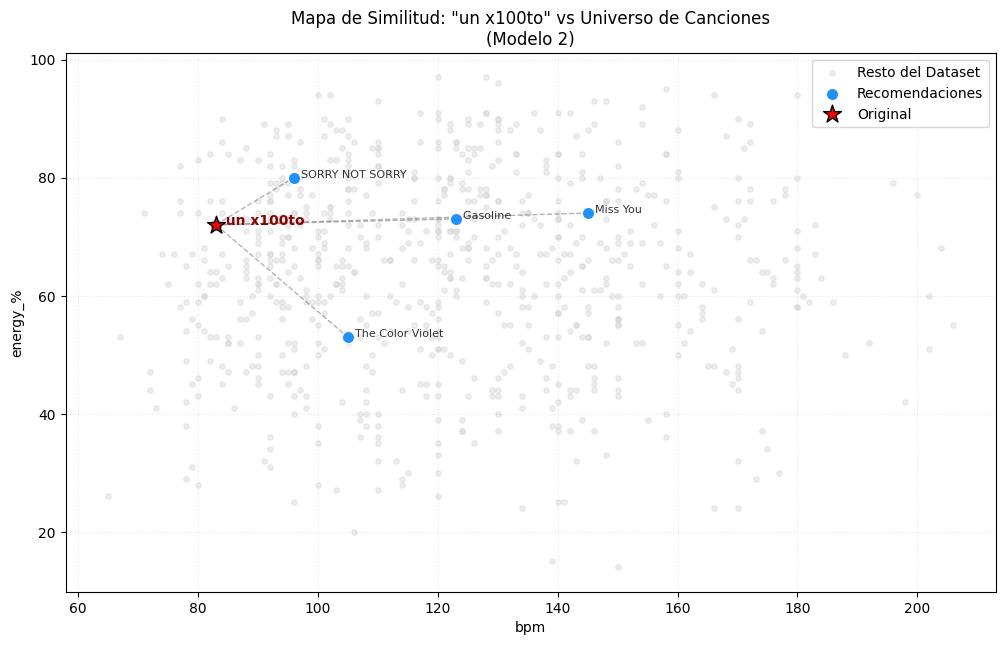

In [ ]:
grafica_similares_dos_caracteristicas(10, ['bpm', 'energy_%'], base_model=2)



Canciones similares a: un x100to - Bad Bunny, Grupo Frontera

 ----Escenario: KNN Con PCA ---- 

	Recomendación 1 --> Take Two - BTS
	Recomendación 2 --> Cheques - Shubh
	Recomendación 3 --> Bar - Tini, L-Gante
	Recomendación 4 --> Anti-Hero - Taylor Swift
	Recomendación 5 --> F2F - SZA


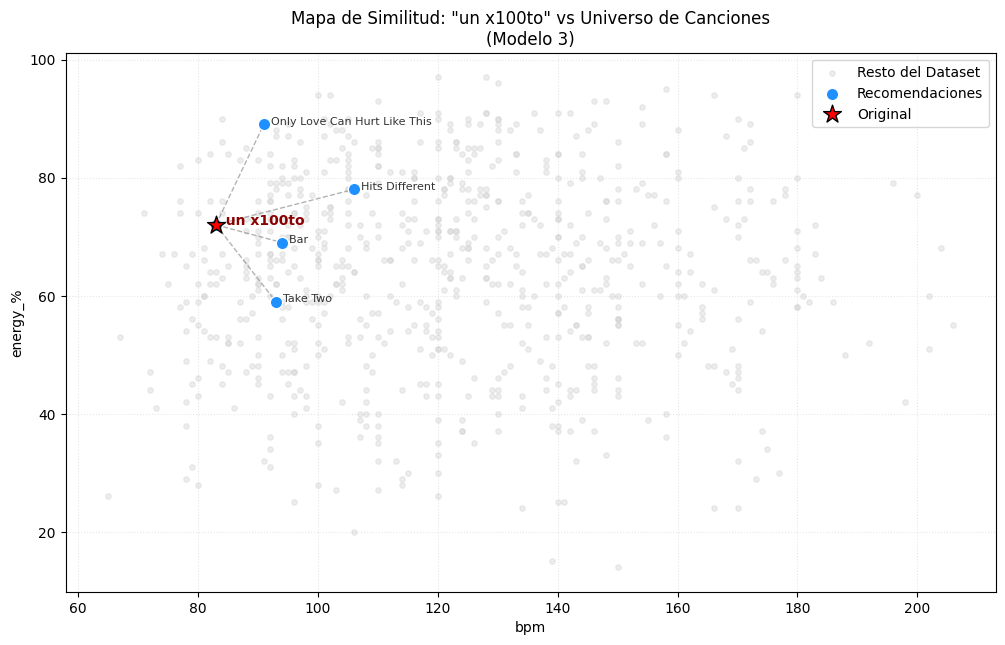

In [ ]:
grafica_similares_dos_caracteristicas(10, ['bpm', 'energy_%'], base_model=3)

# Exportar recomendaciones y data


In [ ]:
def dataframe_recomendaciones_modelo(indices, df):
    columns = ['id_song', 'track_name', 'artist(s)_name',
               'id_rec_1', 'id_rec_2', 'id_rec_3', 'id_rec_4', 'id_rec_5' ]

    id_artists = []
    max_artists = 0
    for id in df.index:
        num_single_artists = len(df.loc[id, 'artist(s)_name'].split(','))
        if(num_single_artists > max_artists):
            max_artists = num_single_artists

    for i in range(max_artists):
        columns.append(f"artist_{i}")

    df_recomendaciones = pd.DataFrame(columns=columns)

    for id in df.index:
        song = df.loc[id, 'track_name']
        id_artists = df.loc[id, 'artist(s)_name']

        for num in range(max_artists):
            if num < len(id_artists.split(',')):
                artist = id_artists.split(',')[num].strip()
            else:
                artist = ""
            artist = normalize_string(artist)
            df_recomendaciones.loc[id, f"artist_{num}"] = artist

        df_recomendaciones.loc[id, 'id_song'] = id
        df_recomendaciones.loc[id, 'track_name'] = song
        df_recomendaciones.loc[id, 'artist(s)_name'] = id_artists

        for i in range(1, 6):
            id_rec = indices[id][i]
            if(id_rec not in df.index):
                print(f"id_rec: {id_rec} no esta en dataframe")
                df_recomendaciones.loc[id, f"id_rec_{i}"] = -1
            else:
                df_recomendaciones.loc[id, f"id_rec_{i}"] = id_rec




    #df_recomendaciones.loc[id] = [id, song, artist, indices[id][1], indices[id][2], indices[id][3], indices[id][4], indices[id][5]]
    print(df_recomendaciones.head())
    return df_recomendaciones

df_rec_con_artistas = dataframe_recomendaciones_modelo(indices_df1, df)
df_rec_con_artistas.to_csv('df_rec_con_artistas.csv', index=False)



  id_song                           track_name    artist(s)_name id_rec_1  \
0       0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook      583   
1       1                                 LALA       Myke Towers      399   
2       2                              vampire    Olivia Rodrigo       76   
3       3                         Cruel Summer      Taylor Swift      370   
4       4                       WHERE SHE GOES         Bad Bunny      296   

  id_rec_2 id_rec_3 id_rec_4 id_rec_5        artist_0   artist_1 artist_2  \
0      350      624      670      591           latto  jung kook            
1       86      655      178      580     myke towers                       
2      646      716      134       36  olivia rodrigo                       
3      372      713      117       91    taylor swift                       
4      278      382      190      425       bad bunny                       

  artist_3 artist_4 artist_5 artist_6 artist_7  
0                        

In [ ]:
def dataframe_completo(indices,df):
    columns = [# Identificar cancion
               'id_song', 'track_name', 'artist(s)_name',
               'id_rec_1', 'id_rec_2', 'id_rec_3', 'id_rec_4', 'id_rec_5',
                # Popularity data
                  "in_spotify_playlists",
                  "in_spotify_charts",
                  "streams",
                  "in_apple_playlists",
                  "in_apple_charts",
                  "in_deezer_playlists",
                  "in_deezer_charts",
                  "in_shazam_charts",
               # Audio features data
                  "bpm",
                  "et_key",
                  "et_mode",
                  "danceability_%",
                  "valence_%",
                  "energy_%",
                  "acousticness_%",
                  "instrumentalness_%",
                  "liveness_%",
                  "speechiness_%"]

    id_artists = []
    max_artists = 0
    for id in df.index:
        num_single_artists = len(df.loc[id, 'artist(s)_name'].split(','))
        if(num_single_artists > max_artists):
            max_artists = num_single_artists

    for i in range(max_artists):
        columns.append(f"artist_{i}")

    df_completo = pd.DataFrame(columns=columns)

    for id in df.index:
        song = df.loc[id, 'track_name']
        id_artists = df.loc[id, 'artist(s)_name']

        for num in range(max_artists):
            if num < len(id_artists.split(',')):
                artist = id_artists.split(',')[num].strip()
            else:
                artist = ""
            artist = normalize_string(artist)
            df_completo.loc[id, f"artist_{num}"] = artist

        df_completo.loc[id, 'id_song'] = id
        df_completo.loc[id, 'track_name'] = song
        df_completo.loc[id, 'artist(s)_name'] = id_artists

        for i in range(1, 6):
            id_rec = indices[id][i]
            if(id_rec not in df.index):
                print(f"id_rec: {id_rec} no esta en dataframe")
                df_completo.loc[id, f"id_rec_{i}"] = -1
            else:
                df_completo.loc[id, f"id_rec_{i}"] = id_rec
        df_completo.loc[id, 'in_spotify_playlists'] = df.loc[id, 'in_spotify_playlists']
        df_completo.loc[id, 'in_spotify_charts'] = df.loc[id, 'in_spotify_charts']
        df_completo.loc[id, 'streams'] = df.loc[id, 'streams']
        df_completo.loc[id, 'in_apple_playlists'] = df.loc[id, 'in_apple_playlists']
        df_completo.loc[id, 'in_apple_charts'] = df.loc[id, 'in_apple_charts']
        df_completo.loc[id, 'in_deezer_playlists'] = df.loc[id, 'in_deezer_playlists']
        df_completo.loc[id, 'in_deezer_charts'] = df.loc[id, 'in_deezer_charts']
        df_completo.loc[id, 'in_shazam_charts'] = df.loc[id, 'in_shazam_charts']
        df_completo.loc[id, 'id_song'] = id
        df_completo.loc[id, 'track_name'] = df.loc[id, 'track_name']
        df_completo.loc[id, 'artist(s)_name'] = df.loc[id, 'artist(s)_name']
        df_completo.loc[id, 'bpm'] = df.loc[id, 'bpm']
        df_completo.loc[id, 'et_key'] = df.loc[id, 'et_key']
        df_completo.loc[id, 'et_mode'] = df.loc[id, 'et_mode']
        df_completo.loc[id, 'danceability_%'] = df.loc[id, 'danceability_%']
        df_completo.loc[id, 'valence_%'] = df.loc[id, 'valence_%']
        df_completo.loc[id, 'energy_%'] = df.loc[id, 'energy_%']
        df_completo.loc[id, 'acousticness_%'] = df.loc[id, 'acousticness_%']
        df_completo.loc[id, 'instrumentalness_%'] = df.loc[id, 'instrumentalness_%']
        df_completo.loc[id, 'liveness_%'] = df.loc[id, 'liveness_%']
        df_completo.loc[id, 'speechiness_%'] = df.loc[id, 'speechiness_%']
    return df_completo

df_completo = dataframe_completo(indices_df1, df)
df_completo.to_csv('df_songs_all.csv', index=False)

In [ ]:
def dataframe_audio_features(df):
    columns = ["id_song", "track_name", "artist(s)_name",
                # Audio features data
                  "bpm",
                  "et_key",
                  "et_mode",
                  "danceability_%",
                  "valence_%",
                  "energy_%",
                  "acousticness_%",
                  "instrumentalness_%",
                  "liveness_%",
                  "speechiness_%"]
    df_popularity = pd.DataFrame(columns=columns)
    for id in df.index:
        df_popularity.loc[id, 'id_song'] = id
        df_popularity.loc[id, 'track_name'] = df.loc[id, 'track_name']
        df_popularity.loc[id, 'artist(s)_name'] = df.loc[id, 'artist(s)_name']
        df_popularity.loc[id, 'bpm'] = df.loc[id, 'bpm']
        df_popularity.loc[id, 'et_key'] = df.loc[id, 'et_key']
        df_popularity.loc[id, 'et_mode'] = df.loc[id, 'et_mode']
        df_popularity.loc[id, 'danceability_%'] = df.loc[id, 'danceability_%']
        df_popularity.loc[id, 'valence_%'] = df.loc[id, 'valence_%']
        df_popularity.loc[id, 'energy_%'] = df.loc[id, 'energy_%']
        df_popularity.loc[id, 'acousticness_%'] = df.loc[id, 'acousticness_%']
        df_popularity.loc[id, 'instrumentalness_%'] = df.loc[id, 'instrumentalness_%']
        df_popularity.loc[id, 'liveness_%'] = df.loc[id, 'liveness_%']
        df_popularity.loc[id, 'speechiness_%'] = df.loc[id, 'speechiness_%']
    return df_popularity

df_audio_features = dataframe_audio_features(df)
df_audio_features.to_csv('df_audio_features.csv', index=False)

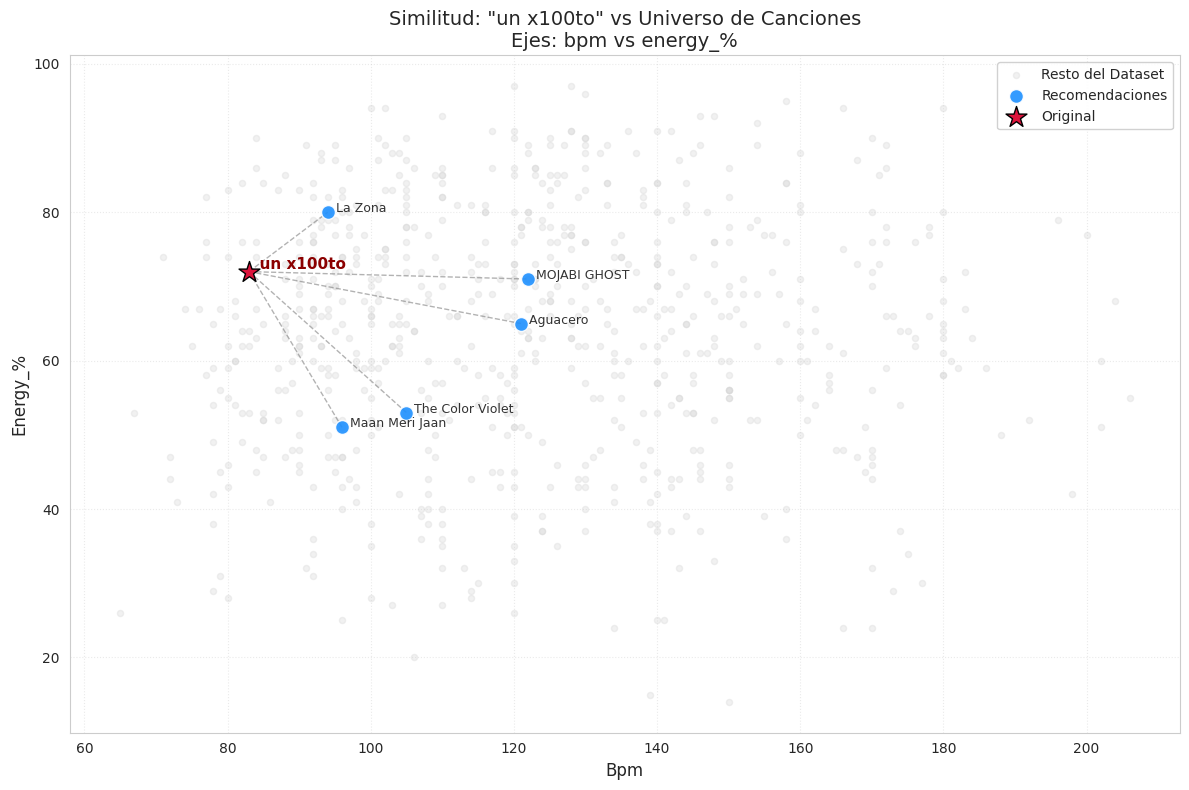

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo (opcional pero recomendado)
sns.set_style("whitegrid")

def grafica_similares_dos_caracteristicas_pagina(idx_song, caracteristicas, df_completo):
    """
    Grafica todo el dataset de fondo, resaltando la canción original y sus recomendaciones
    con líneas de conexión.

    Args:
        idx_song (int): El valor de la columna 'id_song' de la canción original.
        caracteristicas (list): Lista con dos strings, ej: ['bpm', 'energy_%'].
        df_completo (DataFrame): DataFrame con los datos cargados.
    """

    # 0. Validaciones iniciales
    # Aseguramos que los nombres de columnas no tengan espacios extra
    df_completo.columns = df_completo.columns.str.strip()

    # Verificar si la canción existe
    fila_original = df_completo[df_completo['id_song'] == idx_song]

    if fila_original.empty:
        print(f"Error: No se encontró ninguna canción con id_song = {idx_song}")
        return

    # Definir ejes
    x_col = caracteristicas[0]
    y_col = caracteristicas[1]

    # 1. Obtener datos de la canción ORIGINAL
    # Usamos .iloc[0] porque el filtro devuelve un DataFrame de 1 fila y necesitamos la Serie
    x_origin = fila_original.iloc[0][x_col]
    y_origin = fila_original.iloc[0][y_col]
    nombre_origin = fila_original.iloc[0]['track_name']

    # 2. Obtener los IDs de las recomendaciones
    # Seleccionamos las columnas de recomendación
    cols_recs = ['id_rec_1', 'id_rec_2', 'id_rec_3', 'id_rec_4', 'id_rec_5']

    # Extraemos los valores y eliminamos posibles NaNs (nulos)
    ids_vecinos = fila_original.iloc[0][cols_recs].dropna().values

    # 3. Filtrar el DataFrame para obtener los datos de los VECINOS
    vecinos_df = df_completo[df_completo['id_song'].isin(ids_vecinos)]

    # --- INICIO DEL GRÁFICO ---
    plt.figure(figsize=(12, 8))

    # A. DIBUJAR TODO EL DATASET (Fondo)
    plt.scatter(df_completo[x_col], df_completo[y_col],
                c='lightgray', s=20, alpha=0.3, label='Resto del Dataset', zorder=0)

    # B. DIBUJAR LÍNEAS (Conectores)
    for _, row in vecinos_df.iterrows():
        x_vecino = row[x_col]
        y_vecino = row[y_col]

        plt.plot([x_origin, x_vecino], [y_origin, y_vecino],
                 c='gray', linestyle='--', linewidth=1, alpha=0.6, zorder=1)

    # C. DIBUJAR PUNTOS DESTACADOS (Recomendaciones)
    plt.scatter(vecinos_df[x_col], vecinos_df[y_col],
                c='dodgerblue', s=100, edgecolors='white', alpha=0.9, label='Recomendaciones', zorder=2)

    # D. DIBUJAR CANCIÓN ORIGINAL
    plt.scatter(x_origin, y_origin,
                c='crimson', s=250, marker='*', edgecolors='black', label='Original', zorder=3)

    # E. ANOTACIONES (Texto)
    # Texto Original
    plt.text(x_origin, y_origin, f"  {nombre_origin}",
             fontsize=11, fontweight='bold', color='darkred', zorder=4,
             verticalalignment='bottom')

    # Texto Recomendaciones
    for _, row in vecinos_df.iterrows():
        plt.text(row[x_col], row[y_col], f"  {row['track_name']}",
                 fontsize=9, color='black', alpha=0.8, zorder=4)

    # Decoración final
    plt.title(f'Similitud: "{nombre_origin}" vs Universo de Canciones\nEjes: {x_col} vs {y_col}', fontsize=14)
    plt.xlabel(x_col.capitalize(), fontsize=12)
    plt.ylabel(y_col.capitalize(), fontsize=12)
    plt.legend(loc='upper right', frameon=True, framealpha=0.9)
    plt.grid(True, linestyle=':', alpha=0.4)

    plt.tight_layout()
    plt.show()

# --- BLOQUE DE EJECUCIÓN ---

# 1. Cargar el CSV (Asegúrate de que la ruta sea correcta)
df_completo = pd.read_csv('df_songs_all.csv')

# 2. Convertir columnas a numérico por seguridad (evita errores con strings numéricos)
cols_to_numeric = ['id_song', 'id_rec_1', 'id_rec_2', 'id_rec_3', 'id_rec_4', 'id_rec_5']
for col in cols_to_numeric:
    # 'coerce' convierte errores a NaN (útil si hay celdas vacías raras)
    if col in df_completo.columns:
        df_completo[col] = pd.to_numeric(df_completo[col], errors='coerce')

# 3. Llamar a la función
# Ejemplo: id_song 10, comparando BPM vs Energía
grafica_similares_dos_caracteristicas_pagina(10, ['bpm', 'energy_%'], df_completo)


--- Coherencia de Audio Features ---


,Original,Promedio Recomendado,Diferencia (Abs),Minimo Recomendado,Maximo Recomendado
bpm,132,121.4,10.6,105,140
energy_%,68,63.2,4.8,39,91
danceability_%,85,80.2,4.8,69,92
valence_%,53,48.0,5.0,32,73
acousticness_%,40,33.2,6.8,14,55
instrumentalness_%,0,0.0,0.0,0,0
liveness_%,9,12.8,3.8,11,15
speechiness_%,4,8.6,4.6,4,21


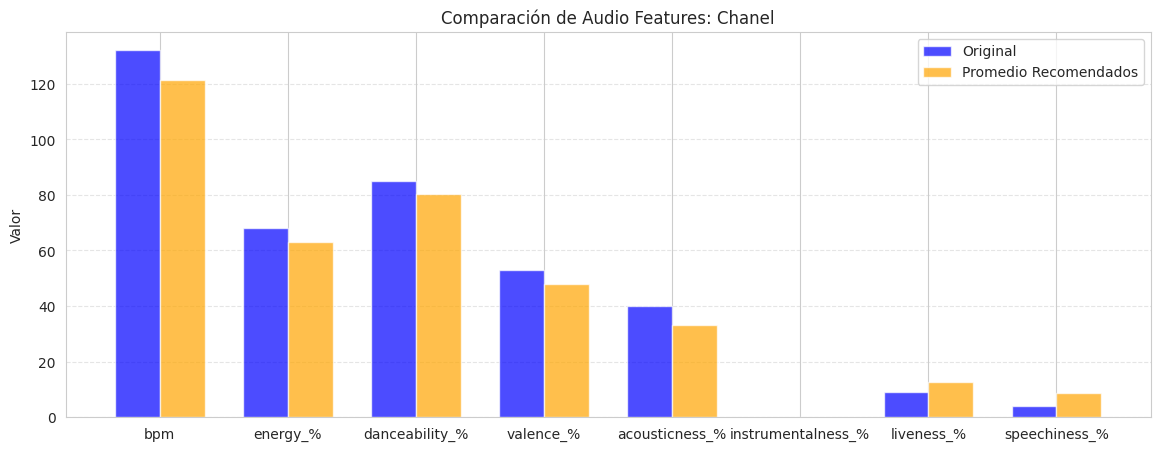

In [ ]:
def evaluar_coherencia_recomendaciones_pagina(song_id, df_completo):
    """
    Verifica si las recomendaciones tienen características coherentes con la entrada.

    Args:
        song_id: Índice o ID de la canción en el DataFrame original.
        df_completo: DataFrame con las características de las canciones.
    """


    features_to_check = ['bpm',
                         'energy_%',
                         'danceability_%',
                         'valence_%',
                         'acousticness_%',
                         "instrumentalness_%",
                         "liveness_%",
                         "speechiness_%"]

    # Verificar si la canción existe
    fila_original = df_completo[df_completo['id_song'] == song_id]

    if fila_original.empty:
        print(f"Error: No se encontró ninguna canción con id_song = {song_id}")
        return

    # Datos de la canción original
    original_stats = df.iloc[song_id][features_to_check]

    # Seleccionamos las columnas de recomendación
    cols_recs = ['id_rec_1', 'id_rec_2', 'id_rec_3', 'id_rec_4', 'id_rec_5']

    # Extraemos los valores y eliminamos posibles NaNs (nulos)
    ids_vecinos = fila_original.iloc[0][cols_recs].dropna().values

    # 3. Filtrar el DataFrame para obtener los datos de los VECINOS
    vecinos_df = df_completo[df_completo['id_song'].isin(ids_vecinos)]

    # Datos de las recomendaciones
    reco_stats = vecinos_df[features_to_check]
    reco_mean = reco_stats.mean()
    reco_min = reco_stats.min()
    reco_max = reco_stats.max()

    # 4. Cálculo del Error (Diferencia promedio)
    diff = np.abs(original_stats - reco_mean)

    print(f"\n--- Coherencia de Audio Features ---")
    comparativa = pd.DataFrame({
        'Original': original_stats,
        'Promedio Recomendado': reco_mean,
        'Diferencia (Abs)': diff,
        'Minimo Recomendado': reco_min,
        'Maximo Recomendado': reco_max
    })
    display(comparativa)

    # 5. Visualización Comparativa
    indices_x = np.arange(len(features_to_check))
    width = 0.35

    plt.figure(figsize=(14, 5))
    plt.bar(indices_x - width/2, original_stats, width, label='Original', color='blue', alpha=0.7)
    plt.bar(indices_x + width/2, reco_mean, width, label='Promedio Recomendados', color='orange', alpha=0.7)

    plt.title(f'Comparación de Audio Features: {df.iloc[song_id]["track_name"]}')
    plt.xticks(indices_x, features_to_check)
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

# 1. Cargar el CSV (Asegúrate de que la ruta sea correcta)
df_completo = pd.read_csv('df_songs_all.csv')

# 2. Convertir columnas a numérico por seguridad (evita errores con strings numéricos)
cols_to_numeric = ['id_song', 'id_rec_1', 'id_rec_2', 'id_rec_3', 'id_rec_4', 'id_rec_5']
for col in cols_to_numeric:
    # 'coerce' convierte errores a NaN (útil si hay celdas vacías raras)
    if col in df_completo.columns:
        df_completo[col] = pd.to_numeric(df_completo[col], errors='coerce')

evaluar_coherencia_recomendaciones_pagina(161, df_completo)

## Incluir genero


In [ ]:
import pandas as pd
import unicodedata

# 1. Definimos una función de normalización robusta (por si no tienes la tuya a mano)
def normalize_string_new(input_str):
    if isinstance(input_str, str):
        # Normaliza caracteres (ej: elimina tildes), pasa a minúsculas y quita espacios extra
        nfkd_form = unicodedata.normalize('NFKD', input_str)
        return "".join([c for c in nfkd_form if not unicodedata.combining(c)]).lower().strip()
    return str(input_str)

# 2. Cargar los datos
# Nota: Uso los nombres de archivo que subiste
df_completo = pd.read_csv('df_songs_all.csv')
df_generos = pd.read_csv('generos_knn.csv')

# 3. Crear columnas temporales de "llave" normalizada para asegurar que coincidan
# Normalizamos track Y artista para evitar errores (ej: dos artistas con una canción llamada "Intro")
df_completo['key_track'] = df_completo['track_name'].apply(normalize_string_new)
df_completo['key_artist'] = df_completo['artist(s)_name'].apply(normalize_string_new)

df_generos['key_track'] = df_generos['track_name'].apply(normalize_string_new)
df_generos['key_artist'] = df_generos['artist(s)_name'].apply(normalize_string_new)

# 4. Hacemos el MERGE (El paso mágico que reemplaza tus bucles)
# Usamos 'left' para mantener todas las canciones del df_completo, aunque no tengan género
df_merged = pd.merge(
    df_completo,
    df_generos[['key_track', 'key_artist', 'genre']], # Solo traemos las llaves y el género
    on=['key_track', 'key_artist'],
    how='left'
)

# 5. Limpieza final (borramos las columnas auxiliares)
df_merged = df_merged.drop(columns=['key_track', 'key_artist'])

# Resultado
print("Primeras filas del resultado:")
print(df_merged[['track_name', 'genre']].head())

# Verificar cuántos géneros se encontraron
conteo = df_merged['genre'].notna().sum()
print(f"\nSe encontraron géneros para {conteo} canciones.")

df_merged.to_csv('df_songs_all_con_genero.csv', index=False)



Primeras filas del resultado:
                            track_name          genre
0  Seven (feat. Latto) (Explicit Ver.)  Urbano Latino
1                                 LALA  Urbano Latino
2                              vampire  Urbano Latino
3                         Cruel Summer        Hip-Hop
4                       WHERE SHE GOES  Hip-Hop / R&B

Se encontraron géneros para 725 canciones.


In [ ]:
import pandas as pd
import unicodedata

# 1. Función de normalización
def normalize_string_new(input_str):
    if isinstance(input_str, str):
        # Normaliza caracteres (elimina tildes), pasa a minúsculas y quita espacios extra
        nfkd_form = unicodedata.normalize('NFKD', input_str)
        return "".join([c for c in nfkd_form if not unicodedata.combining(c)]).lower().strip()
    return str(input_str)

# 2. Cargar los datos
print("Cargando archivos...")
df_completo = pd.read_csv('df_songs_all.csv')
df_subgeneros = pd.read_csv('spotify_subgenre.csv')

# 3. Crear columnas temporales de "llave" normalizada
print("Normalizando llaves de cruce...")
df_completo['key_track'] = df_completo['track_name'].apply(normalize_string_new)
df_completo['key_artist'] = df_completo['artist(s)_name'].apply(normalize_string_new)

# CORRECCIÓN AQUÍ: Usamos 'df_subgeneros' en lugar de 'df_generos'
df_subgeneros['key_track'] = df_subgeneros['track_name'].apply(normalize_string_new)
df_subgeneros['key_artist'] = df_subgeneros['artist(s)_name'].apply(normalize_string_new)

# 3.1 Eliminamos duplicados en el archivo de subgéneros antes de unir
# Esto es vital: si una canción aparece 2 veces en el archivo de subgéneros,
# el merge duplicaría la canción en tu dataframe principal.
df_subgeneros_unique = df_subgeneros.drop_duplicates(subset=['key_track', 'key_artist'])

# 4. Hacemos el MERGE
print("Uniendo dataframes...")
df_merged = pd.merge(
    df_completo,
    # Seleccionamos las columnas a traer (incluyendo las nuevas 'genre_inferred' y 'subgenre_inferred')
    df_subgeneros_unique[['key_track', 'key_artist', 'genre_inferred', 'subgenre_inferred']],
    on=['key_track', 'key_artist'],
    how='left'
)

# 5. Limpieza final (borramos las columnas auxiliares)
df_merged = df_merged.drop(columns=['key_track', 'key_artist'])

# Resultado
print("\n--- Primeras filas del resultado ---")
# Mostramos el nombre, el género original y el subgénero nuevo
cols_to_show = ['track_name', 'genre', 'subgenre_inferred']
# Filtramos solo columnas que existan para evitar errores de visualización
cols_existentes = [c for c in cols_to_show if c in df_merged.columns]
print(df_merged[cols_existentes].head())

# Verificar cuántos subgéneros se encontraron
conteo = df_merged['subgenre_inferred'].notna().sum()
total = len(df_merged)
print(f"\nSe encontraron subgéneros para {conteo} de {total} canciones.")

# Guardar
df_merged.to_csv('df_songs_all_con_genero_subgenero.csv', index=False)
print("Archivo guardado exitosamente.")

Cargando archivos...
Normalizando llaves de cruce...
Uniendo dataframes...

--- Primeras filas del resultado ---
                            track_name  subgenre_inferred
0  Seven (feat. Latto) (Explicit Ver.)  Latin / Reggaeton
1                                 LALA                NaN
2                              vampire                NaN
3                         Cruel Summer                NaN
4                       WHERE SHE GOES                Pop

Se encontraron subgéneros para 161 de 725 canciones.
Archivo guardado exitosamente.


In [ ]:
df_merged['genre_inferred'].value_counts()

,count
genre_inferred,
Pop,211
Hip-Hop / Rap,185
Latin / Reggaeton,167
R&B,63
K-Pop,50
Rock / Alternative,36
Dance / Electronic,13


In [ ]:
df_merged['subgenre_inferred'].value_counts()

,count
subgenre_inferred,
Pop,64
Latin / Reggaeton,46
Hip-Hop / Rap,40
Rock / Alternative,6
K-Pop,3
Dance / Electronic,2
